In [11]:
import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets

In [26]:
from utils import Logger

In [13]:
train_data = torchvision.datasets.FashionMNIST(root='data', train=True, transform=None, target_transform=None, download=True)
test_data = torchvision.datasets.FashionMNIST(root='data', train=False, transform=None, target_transform=None, download=True)

In [15]:
def mnist_data():
    compose = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
torchvision.transforms.Normalize((0.5,), (0.5,))
])
    out_dir = './dataset'
    return torchvision.datasets.FashionMNIST(root='data', train=True, transform=compose, download=True)
# Load data
data = mnist_data()
# Create loader with data, so that we can iterate over it
data_loader = torch.utils.data.DataLoader(data, batch_size=100, shuffle=True)
# Num batches
num_batches = len(data_loader)

In [16]:
class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        #Takes image (784) returns value between 0 and 1
        n_features = 784
        n_out = 1
        
        #Layer 1: Linear with reLu and dropout
        self.hidden0 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )
        
 
    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
discriminator = DiscriminatorNet()       

In [17]:
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

In [18]:
class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """
    def __init__(self): # takes latent variable returns image
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 784
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )
    
    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
generator = GeneratorNet()

In [19]:
def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = Variable(torch.randn(size, 100))
    return n

In [20]:
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

In [21]:
loss = nn.BCELoss()

In [22]:
def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    return data

In [23]:
def train_discriminator(optimizer, real_data, fake_data):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, ones_target(N) )
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, zeros_target(N))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

In [24]:
def train_generator(optimizer, fake_data):
    N = fake_data.size(0)
    
    # Reset gradients
    optimizer.zero_grad()
    
    # Sample noise and generate fake data
    # generator is trained on discriminatir's failure
    prediction = discriminator(fake_data)
    
    # Calculate error and backpropagate
    error = loss(prediction, ones_target(N))
    error.backward()
    
    # Update weights with gradients
    optimizer.step()
    
    # Return error
    return error

In [25]:
num_test_samples = 16
test_noise = noise(num_test_samples)

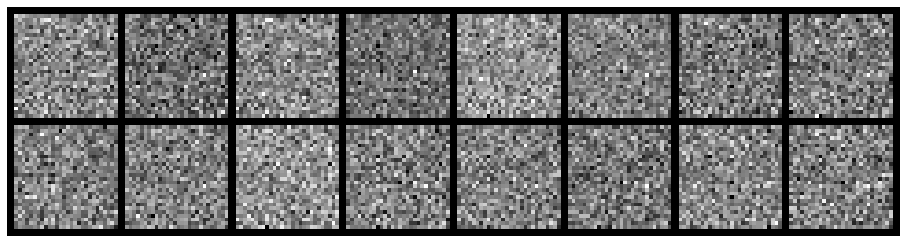

Epoch: [0/20], Batch Num: [0/600]
Discriminator Loss: 1.3850, Generator Loss: 0.7137
D(x): 0.4904, D(G(z)): 0.4894


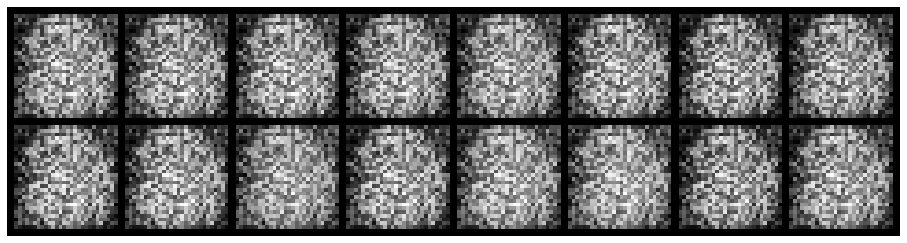

Epoch: [0/20], Batch Num: [100/600]
Discriminator Loss: 2.0078, Generator Loss: 0.8285
D(x): 0.6576, D(G(z)): 0.7258


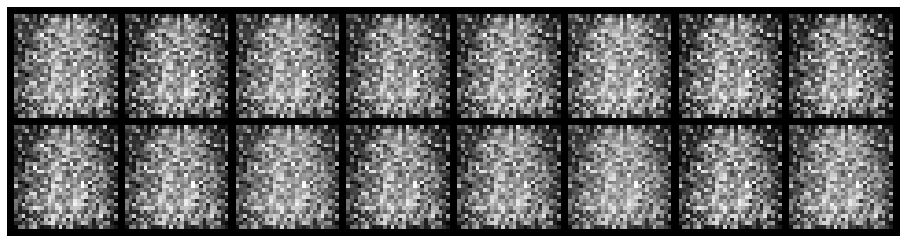

Epoch: [0/20], Batch Num: [200/600]
Discriminator Loss: 0.7148, Generator Loss: 2.7853
D(x): 0.7937, D(G(z)): 0.2795


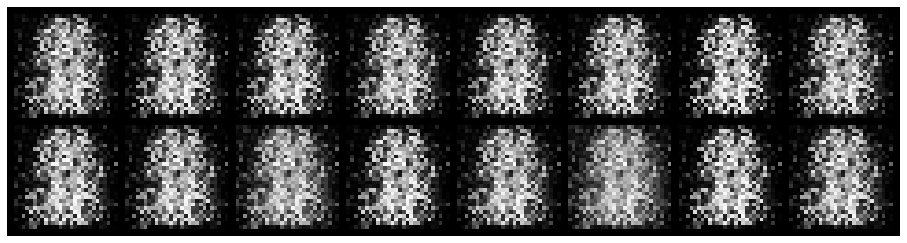

Epoch: [0/20], Batch Num: [300/600]
Discriminator Loss: 1.6193, Generator Loss: 3.9846
D(x): 0.7006, D(G(z)): 0.5378


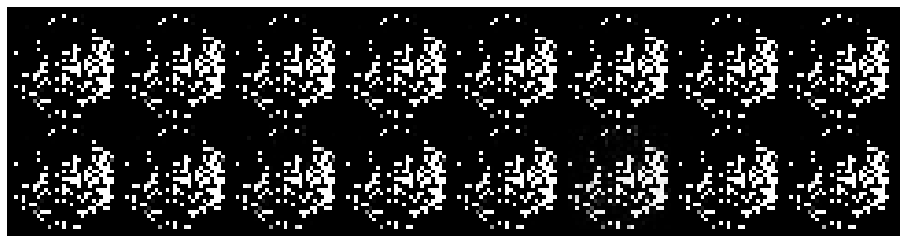

Epoch: [0/20], Batch Num: [400/600]
Discriminator Loss: 0.0151, Generator Loss: 13.0817
D(x): 0.9911, D(G(z)): 0.0010


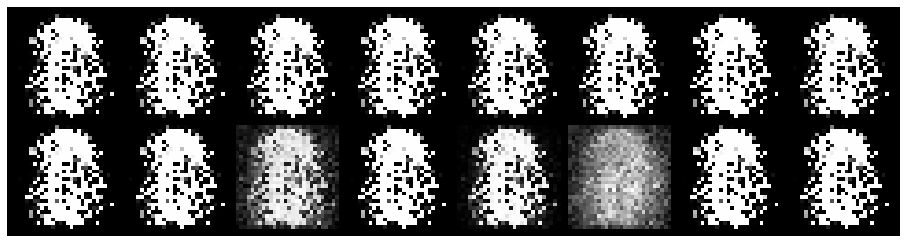

Epoch: [0/20], Batch Num: [500/600]
Discriminator Loss: 0.1298, Generator Loss: 6.1894
D(x): 0.9564, D(G(z)): 0.0337


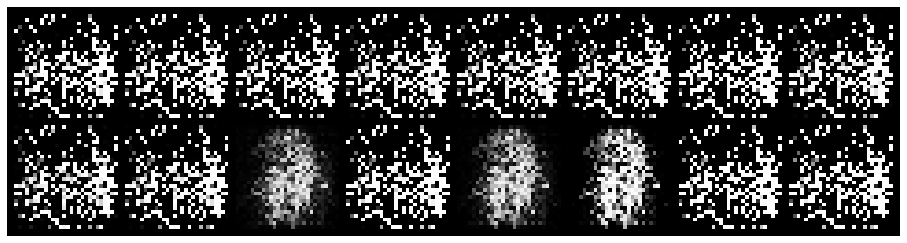

Epoch: [1/20], Batch Num: [0/600]
Discriminator Loss: 0.2153, Generator Loss: 5.4455
D(x): 0.9053, D(G(z)): 0.0667


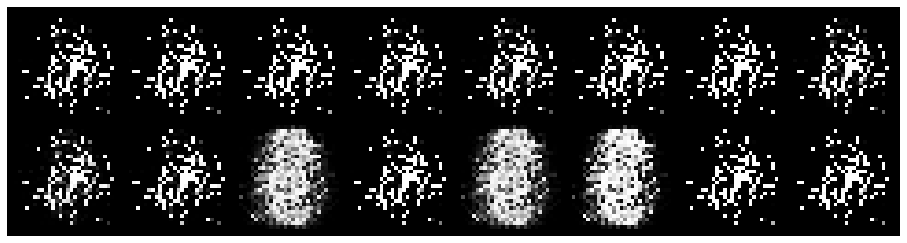

Epoch: [1/20], Batch Num: [100/600]
Discriminator Loss: 0.0722, Generator Loss: 8.6762
D(x): 0.9680, D(G(z)): 0.0291


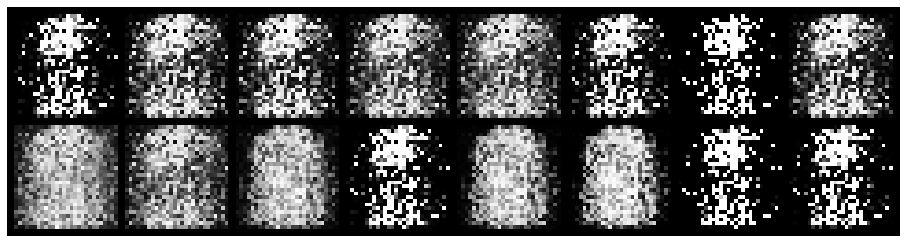

Epoch: [1/20], Batch Num: [200/600]
Discriminator Loss: 0.2481, Generator Loss: 7.5754
D(x): 0.9664, D(G(z)): 0.1322


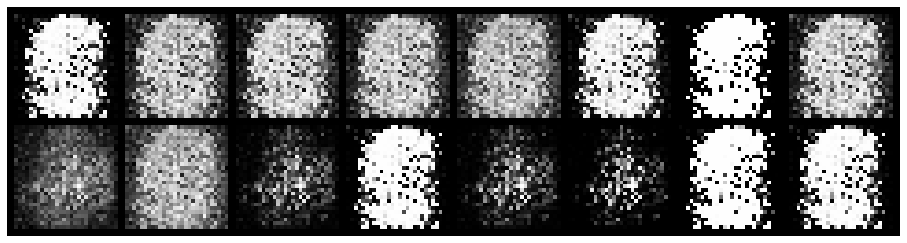

Epoch: [1/20], Batch Num: [300/600]
Discriminator Loss: 0.1331, Generator Loss: 8.7788
D(x): 0.9558, D(G(z)): 0.0466


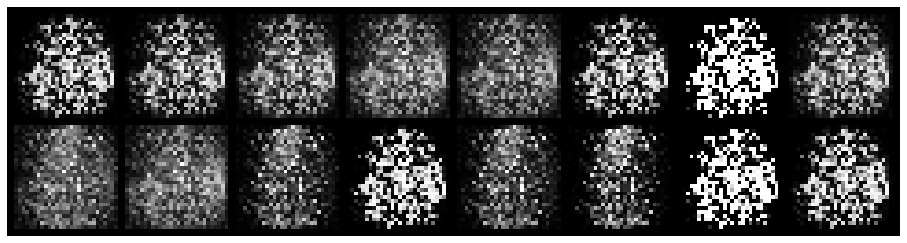

Epoch: [1/20], Batch Num: [400/600]
Discriminator Loss: 0.3238, Generator Loss: 9.2105
D(x): 0.9160, D(G(z)): 0.0882


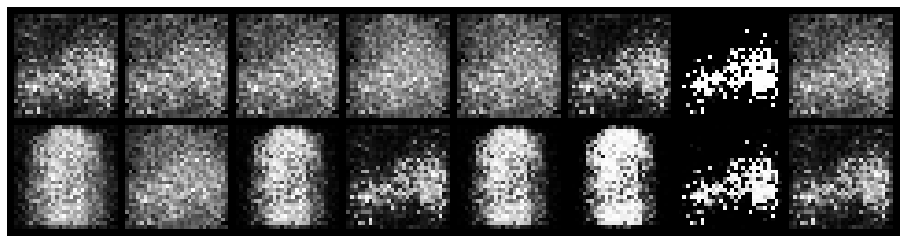

Epoch: [1/20], Batch Num: [500/600]
Discriminator Loss: 1.2790, Generator Loss: 4.2455
D(x): 0.8122, D(G(z)): 0.3462


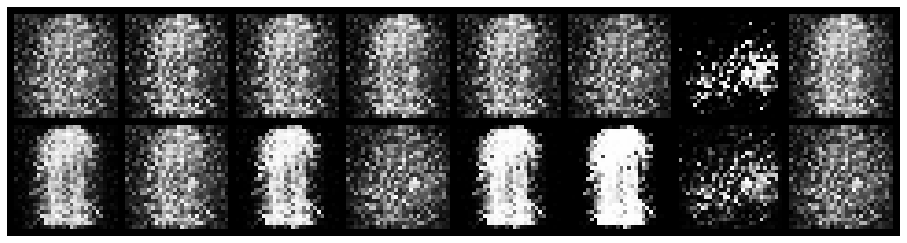

Epoch: [2/20], Batch Num: [0/600]
Discriminator Loss: 0.3022, Generator Loss: 6.7276
D(x): 0.8989, D(G(z)): 0.0892


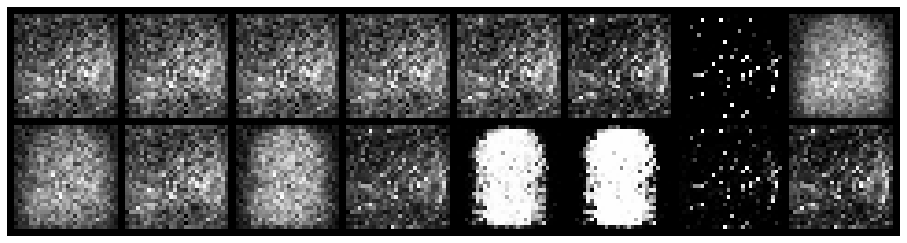

Epoch: [2/20], Batch Num: [100/600]
Discriminator Loss: 0.5837, Generator Loss: 3.8393
D(x): 0.8809, D(G(z)): 0.1866


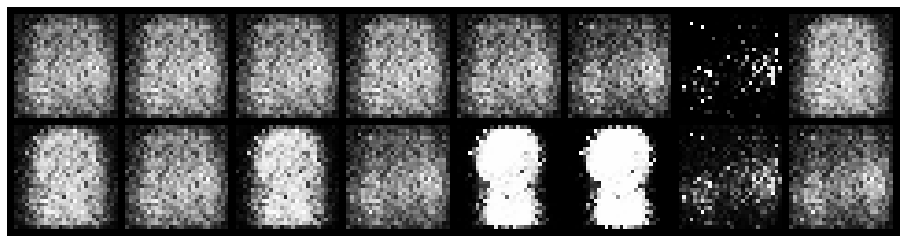

Epoch: [2/20], Batch Num: [200/600]
Discriminator Loss: 0.3848, Generator Loss: 6.6605
D(x): 0.8755, D(G(z)): 0.1047


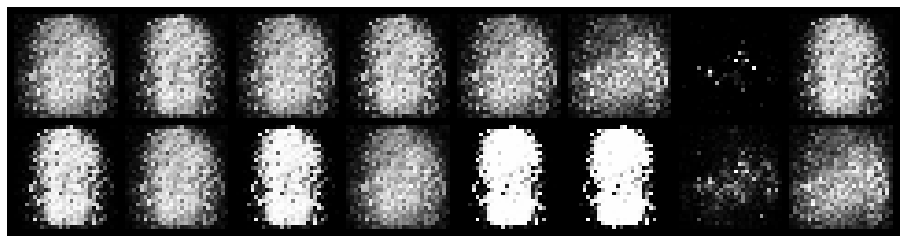

Epoch: [2/20], Batch Num: [300/600]
Discriminator Loss: 0.5658, Generator Loss: 3.6963
D(x): 0.7967, D(G(z)): 0.1042


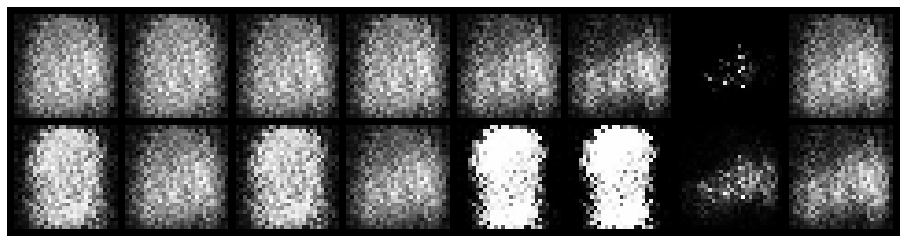

Epoch: [2/20], Batch Num: [400/600]
Discriminator Loss: 0.4481, Generator Loss: 2.3732
D(x): 0.9118, D(G(z)): 0.2249


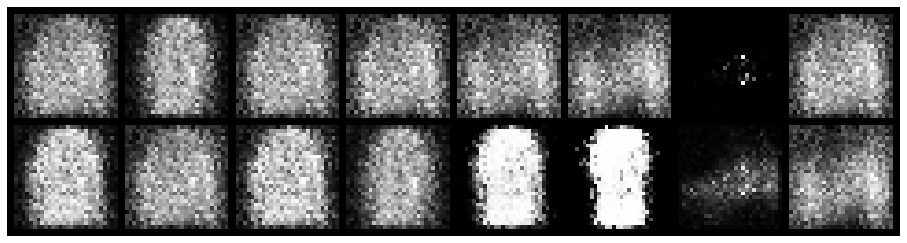

Epoch: [2/20], Batch Num: [500/600]
Discriminator Loss: 0.5705, Generator Loss: 3.3452
D(x): 0.8697, D(G(z)): 0.1743


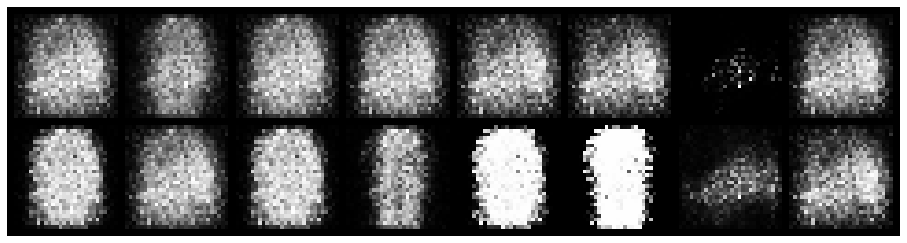

Epoch: [3/20], Batch Num: [0/600]
Discriminator Loss: 0.3097, Generator Loss: 4.8311
D(x): 0.8454, D(G(z)): 0.0423


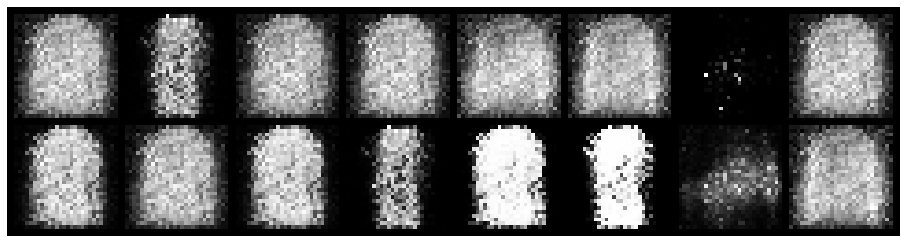

Epoch: [3/20], Batch Num: [100/600]
Discriminator Loss: 0.2487, Generator Loss: 3.7171
D(x): 0.9491, D(G(z)): 0.1373


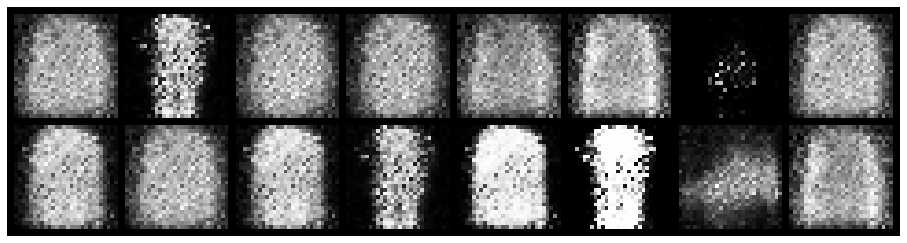

Epoch: [3/20], Batch Num: [200/600]
Discriminator Loss: 0.3822, Generator Loss: 3.6335
D(x): 0.9260, D(G(z)): 0.1608


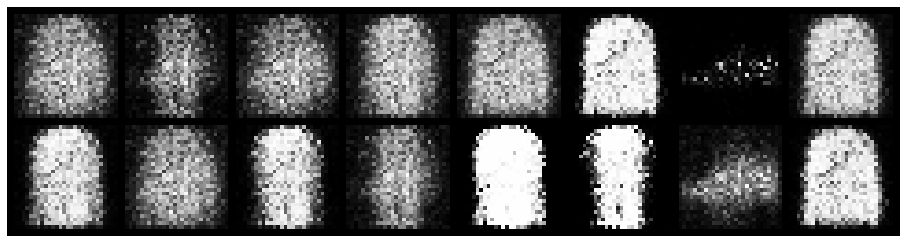

Epoch: [3/20], Batch Num: [300/600]
Discriminator Loss: 0.2944, Generator Loss: 4.0772
D(x): 0.9170, D(G(z)): 0.1106


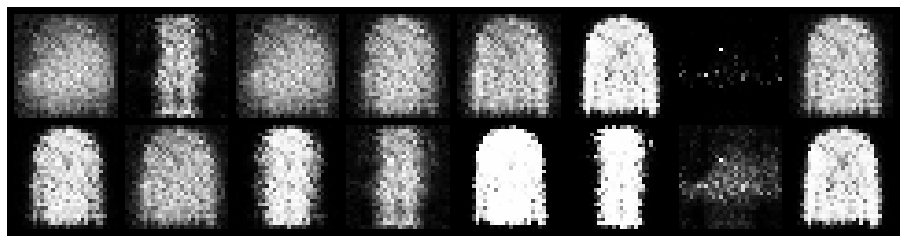

Epoch: [3/20], Batch Num: [400/600]
Discriminator Loss: 0.3847, Generator Loss: 3.6825
D(x): 0.9113, D(G(z)): 0.1268


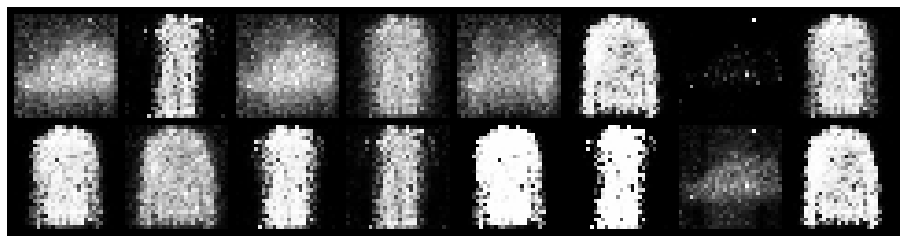

Epoch: [3/20], Batch Num: [500/600]
Discriminator Loss: 0.2087, Generator Loss: 4.2358
D(x): 0.9295, D(G(z)): 0.0746


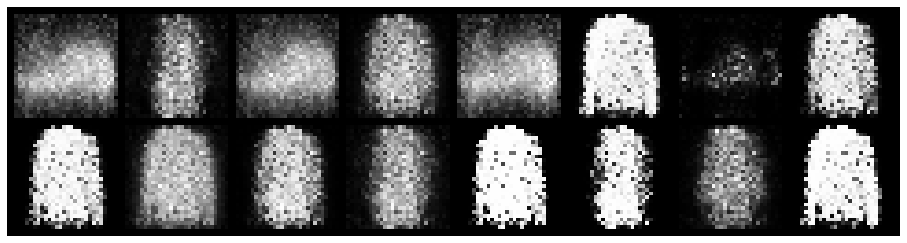

Epoch: [4/20], Batch Num: [0/600]
Discriminator Loss: 0.2811, Generator Loss: 4.5482
D(x): 0.8894, D(G(z)): 0.0534


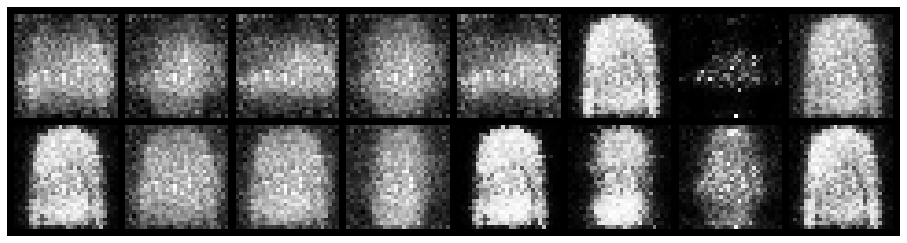

Epoch: [4/20], Batch Num: [100/600]
Discriminator Loss: 0.6335, Generator Loss: 3.1281
D(x): 0.8427, D(G(z)): 0.0681


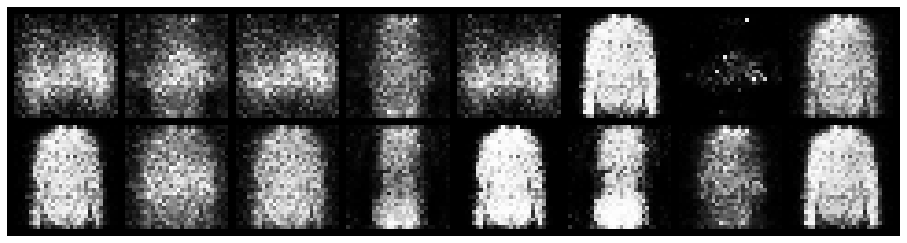

Epoch: [4/20], Batch Num: [200/600]
Discriminator Loss: 0.3752, Generator Loss: 4.2807
D(x): 0.8337, D(G(z)): 0.0513


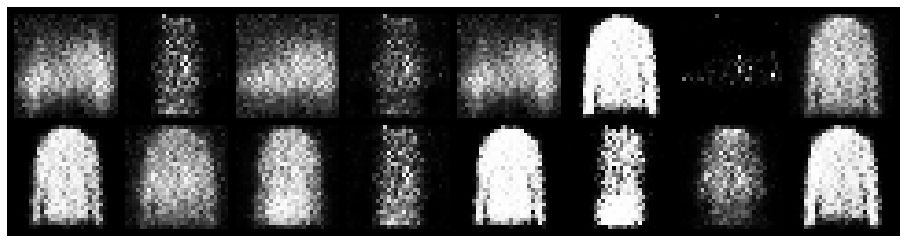

Epoch: [4/20], Batch Num: [300/600]
Discriminator Loss: 0.2984, Generator Loss: 3.6927
D(x): 0.9214, D(G(z)): 0.1137


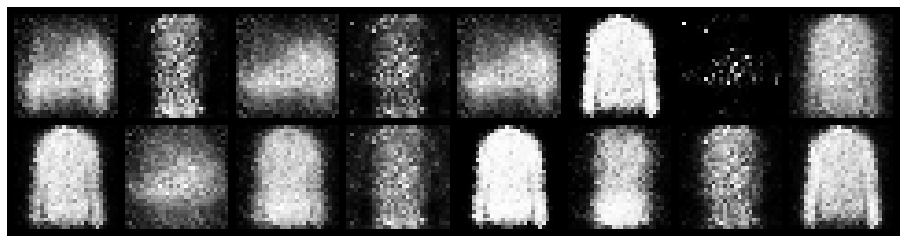

Epoch: [4/20], Batch Num: [400/600]
Discriminator Loss: 0.5027, Generator Loss: 3.3657
D(x): 0.8536, D(G(z)): 0.1419


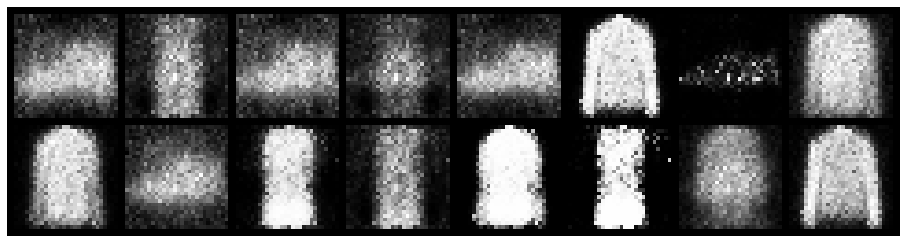

Epoch: [4/20], Batch Num: [500/600]
Discriminator Loss: 0.3350, Generator Loss: 2.6527
D(x): 0.9493, D(G(z)): 0.1610


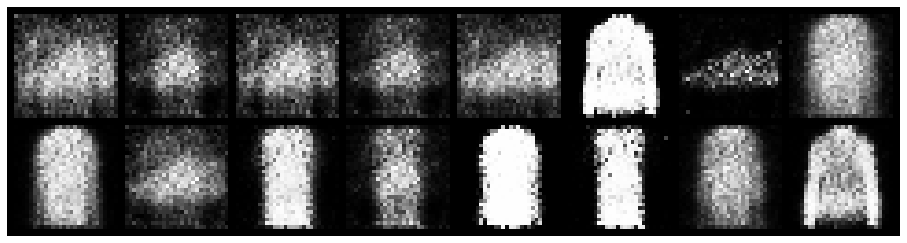

Epoch: [5/20], Batch Num: [0/600]
Discriminator Loss: 0.3129, Generator Loss: 3.8949
D(x): 0.9110, D(G(z)): 0.1022


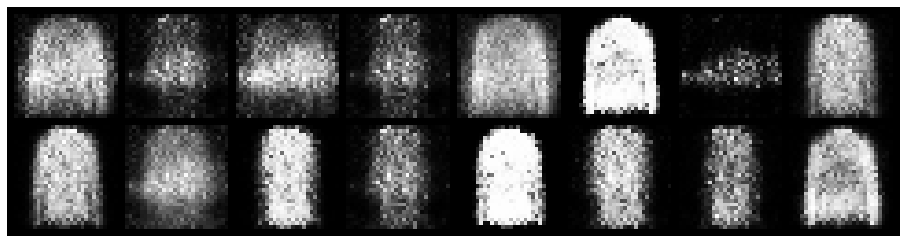

Epoch: [5/20], Batch Num: [100/600]
Discriminator Loss: 0.2865, Generator Loss: 3.8452
D(x): 0.9111, D(G(z)): 0.0894


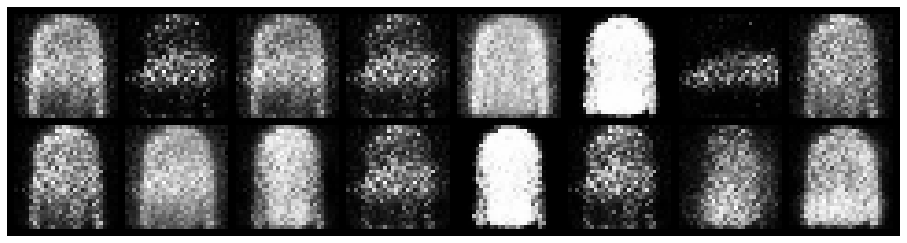

Epoch: [5/20], Batch Num: [200/600]
Discriminator Loss: 0.5250, Generator Loss: 3.8998
D(x): 0.8619, D(G(z)): 0.1485


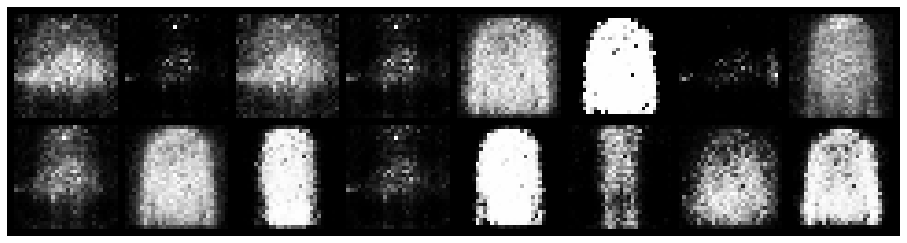

Epoch: [5/20], Batch Num: [300/600]
Discriminator Loss: 0.4618, Generator Loss: 3.1894
D(x): 0.8334, D(G(z)): 0.1230


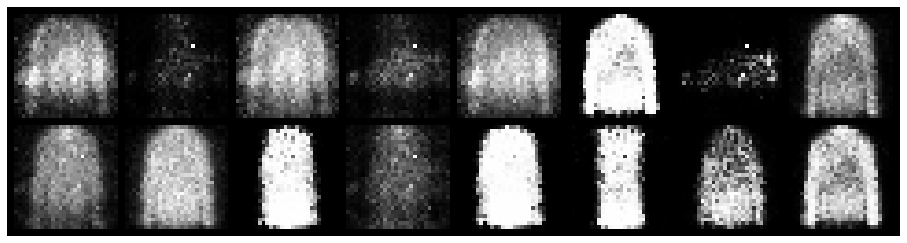

Epoch: [5/20], Batch Num: [400/600]
Discriminator Loss: 0.3071, Generator Loss: 3.0716
D(x): 0.9048, D(G(z)): 0.0853


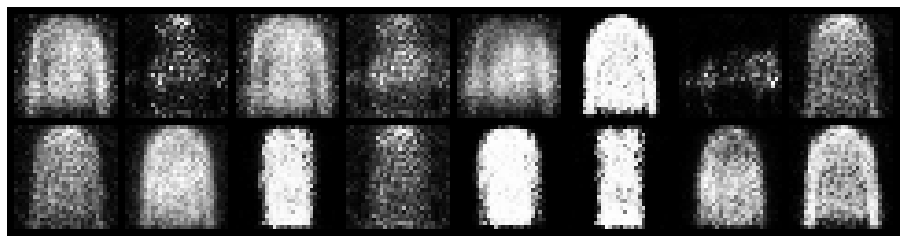

Epoch: [5/20], Batch Num: [500/600]
Discriminator Loss: 0.5868, Generator Loss: 2.8422
D(x): 0.8109, D(G(z)): 0.1466


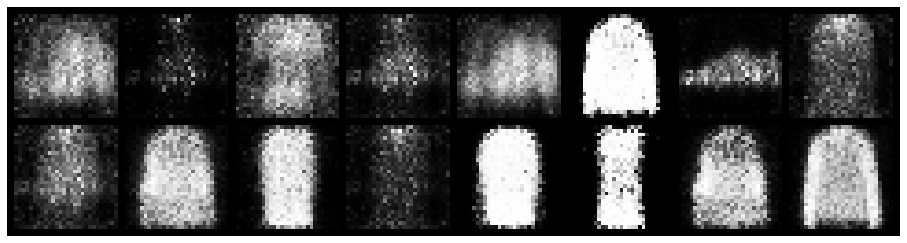

Epoch: [6/20], Batch Num: [0/600]
Discriminator Loss: 0.3967, Generator Loss: 3.2747
D(x): 0.8847, D(G(z)): 0.1313


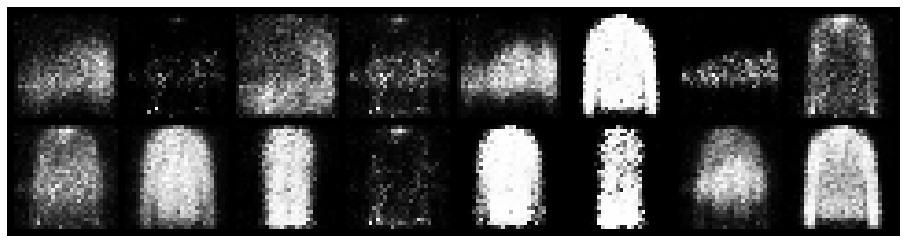

Epoch: [6/20], Batch Num: [100/600]
Discriminator Loss: 0.5458, Generator Loss: 3.0779
D(x): 0.8940, D(G(z)): 0.2040


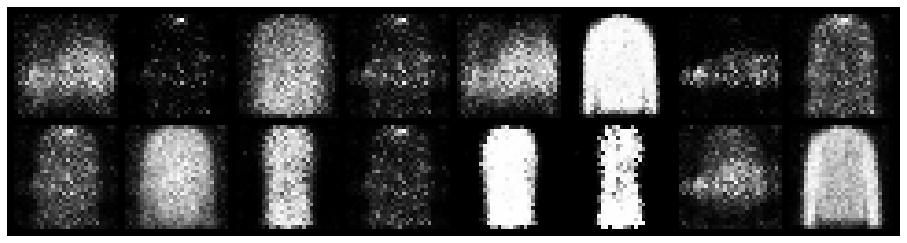

Epoch: [6/20], Batch Num: [200/600]
Discriminator Loss: 0.5026, Generator Loss: 2.9278
D(x): 0.8446, D(G(z)): 0.1409


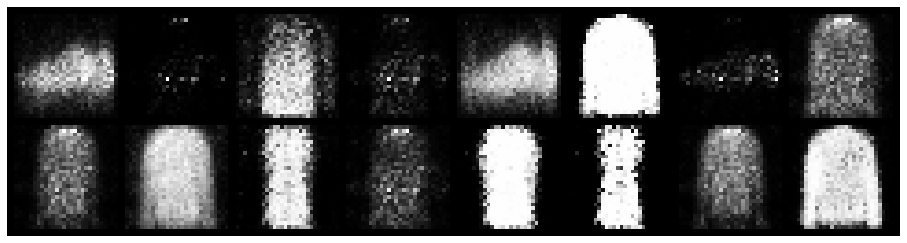

Epoch: [6/20], Batch Num: [300/600]
Discriminator Loss: 0.4967, Generator Loss: 2.4411
D(x): 0.8387, D(G(z)): 0.1603


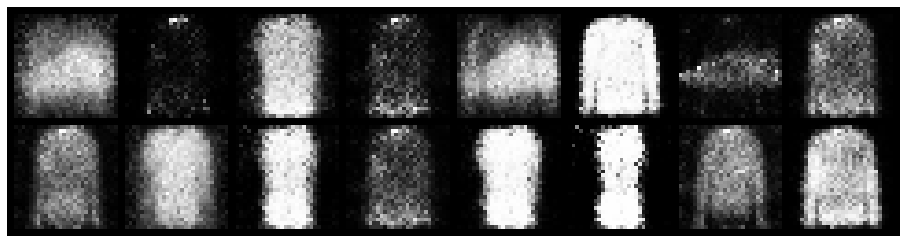

Epoch: [6/20], Batch Num: [400/600]
Discriminator Loss: 0.6385, Generator Loss: 2.6575
D(x): 0.7878, D(G(z)): 0.1815


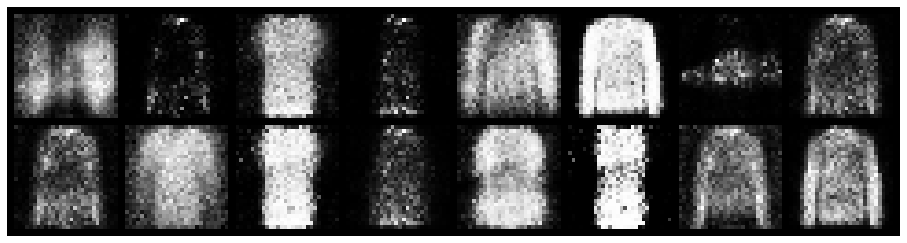

Epoch: [6/20], Batch Num: [500/600]
Discriminator Loss: 0.5875, Generator Loss: 2.8190
D(x): 0.7756, D(G(z)): 0.1264


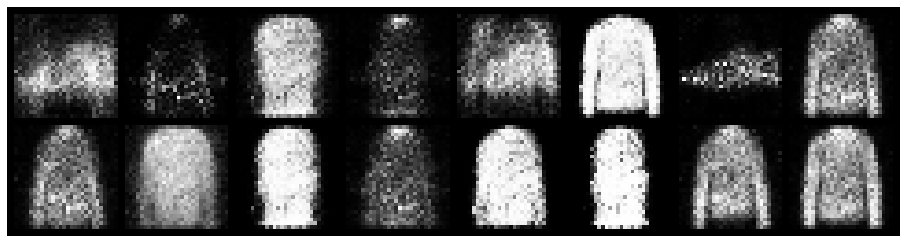

Epoch: [7/20], Batch Num: [0/600]
Discriminator Loss: 0.5851, Generator Loss: 2.4791
D(x): 0.8183, D(G(z)): 0.1650


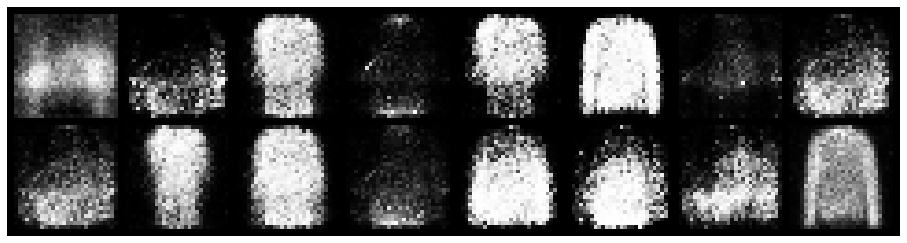

Epoch: [7/20], Batch Num: [100/600]
Discriminator Loss: 0.7105, Generator Loss: 1.9387
D(x): 0.7304, D(G(z)): 0.1818


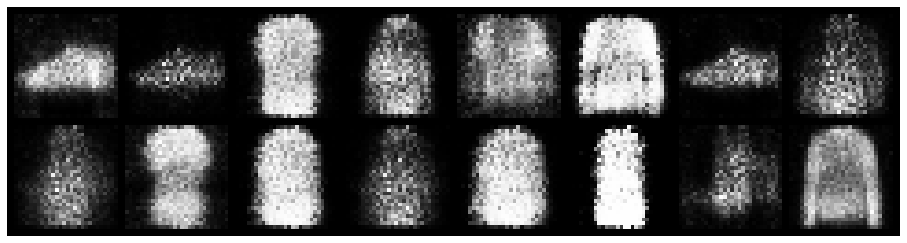

Epoch: [7/20], Batch Num: [200/600]
Discriminator Loss: 0.7566, Generator Loss: 1.9083
D(x): 0.8222, D(G(z)): 0.2920


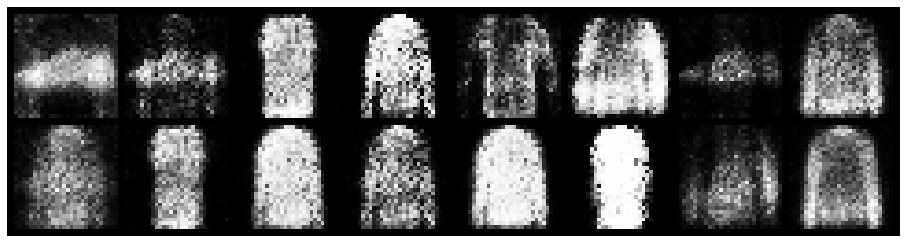

Epoch: [7/20], Batch Num: [300/600]
Discriminator Loss: 0.6316, Generator Loss: 2.1205
D(x): 0.8469, D(G(z)): 0.2327


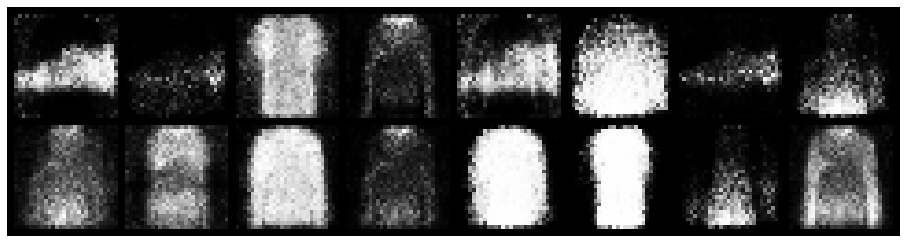

Epoch: [7/20], Batch Num: [400/600]
Discriminator Loss: 0.5394, Generator Loss: 2.6670
D(x): 0.8138, D(G(z)): 0.1314


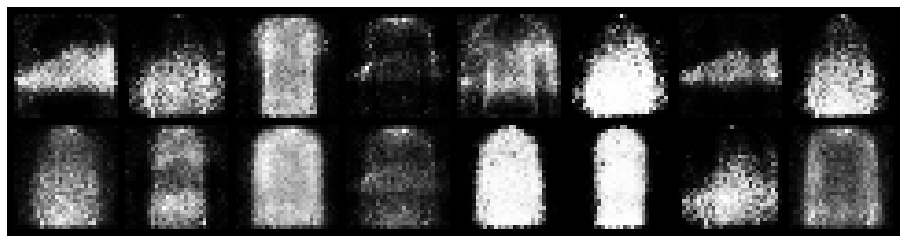

Epoch: [7/20], Batch Num: [500/600]
Discriminator Loss: 0.6280, Generator Loss: 2.5648
D(x): 0.8442, D(G(z)): 0.2293


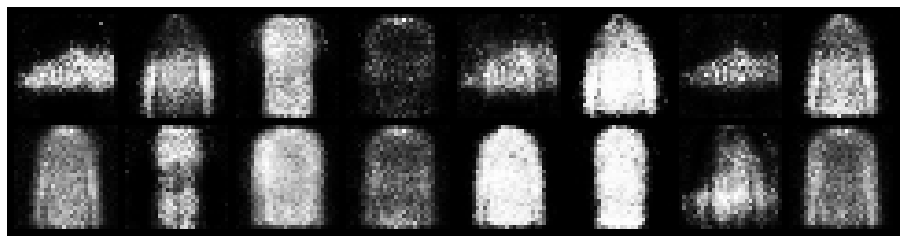

Epoch: [8/20], Batch Num: [0/600]
Discriminator Loss: 0.3958, Generator Loss: 2.8985
D(x): 0.8558, D(G(z)): 0.1063


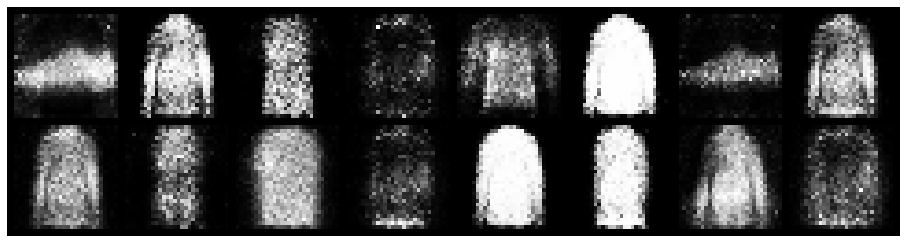

Epoch: [8/20], Batch Num: [100/600]
Discriminator Loss: 0.6036, Generator Loss: 2.2447
D(x): 0.8040, D(G(z)): 0.1769


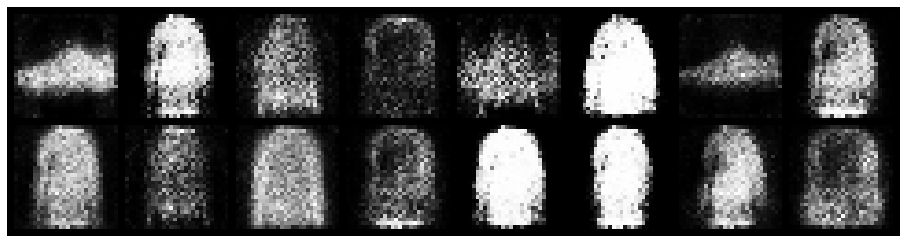

Epoch: [8/20], Batch Num: [200/600]
Discriminator Loss: 0.7476, Generator Loss: 1.7259
D(x): 0.7741, D(G(z)): 0.2776


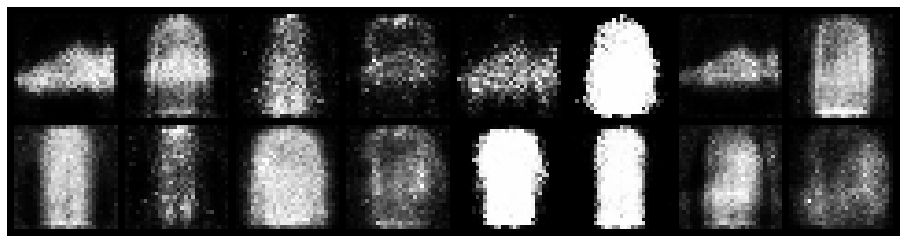

Epoch: [8/20], Batch Num: [300/600]
Discriminator Loss: 1.1049, Generator Loss: 1.6551
D(x): 0.6562, D(G(z)): 0.2939


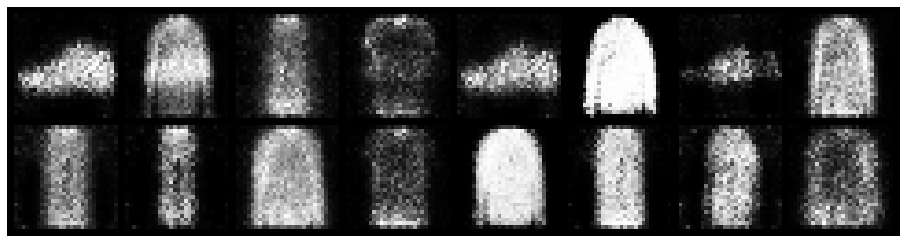

Epoch: [8/20], Batch Num: [400/600]
Discriminator Loss: 1.0046, Generator Loss: 2.0124
D(x): 0.6725, D(G(z)): 0.2557


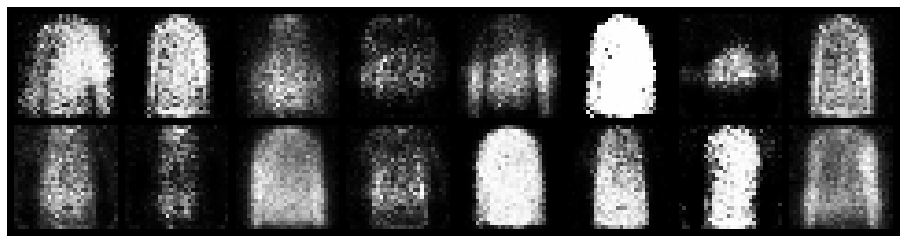

Epoch: [8/20], Batch Num: [500/600]
Discriminator Loss: 0.6239, Generator Loss: 2.3318
D(x): 0.8086, D(G(z)): 0.1952


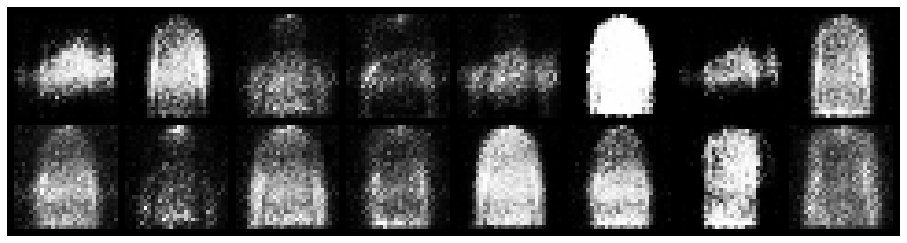

Epoch: [9/20], Batch Num: [0/600]
Discriminator Loss: 0.7057, Generator Loss: 2.3908
D(x): 0.7509, D(G(z)): 0.1682


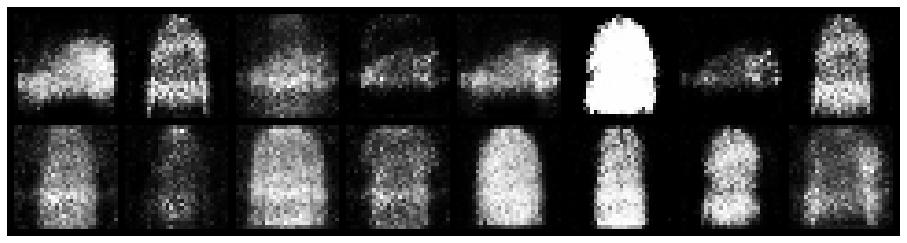

Epoch: [9/20], Batch Num: [100/600]
Discriminator Loss: 0.4418, Generator Loss: 2.3896
D(x): 0.8617, D(G(z)): 0.1653


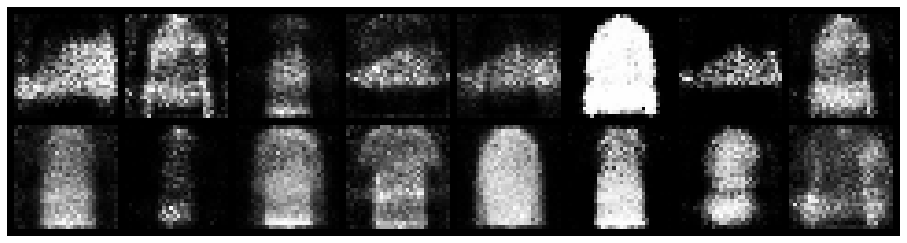

Epoch: [9/20], Batch Num: [200/600]
Discriminator Loss: 0.6574, Generator Loss: 2.1224
D(x): 0.7875, D(G(z)): 0.2215


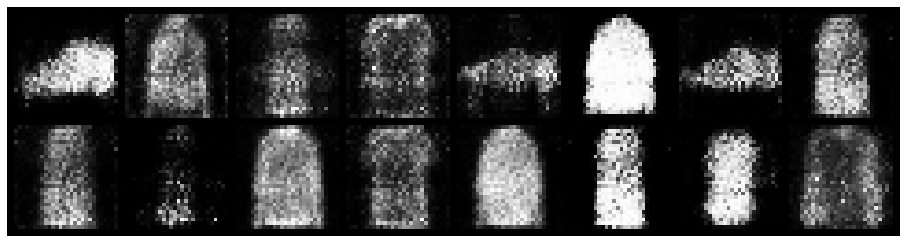

Epoch: [9/20], Batch Num: [300/600]
Discriminator Loss: 0.5902, Generator Loss: 2.0542
D(x): 0.8218, D(G(z)): 0.2348


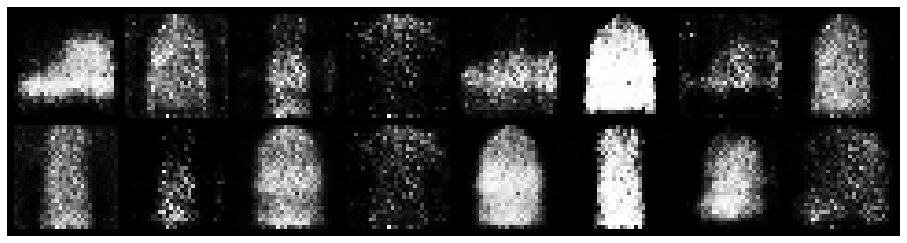

Epoch: [9/20], Batch Num: [400/600]
Discriminator Loss: 0.5125, Generator Loss: 1.9777
D(x): 0.8695, D(G(z)): 0.2316


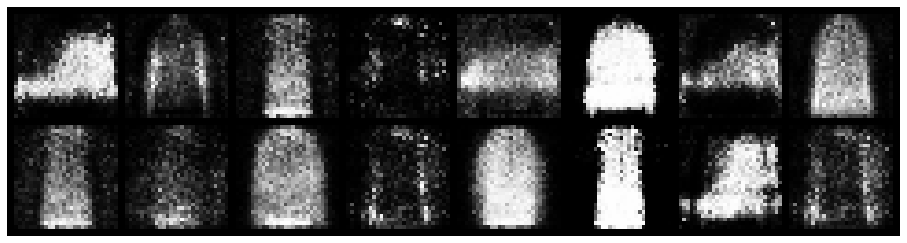

Epoch: [9/20], Batch Num: [500/600]
Discriminator Loss: 0.9802, Generator Loss: 1.8110
D(x): 0.6939, D(G(z)): 0.2629


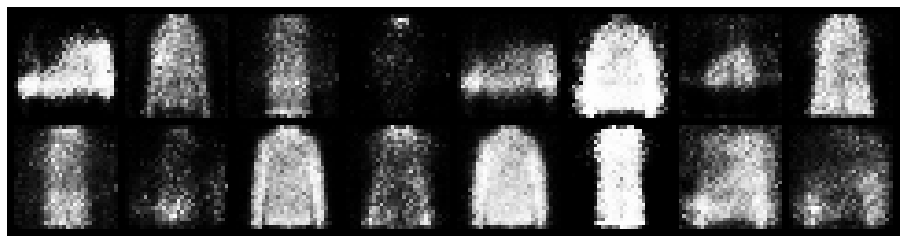

Epoch: [10/20], Batch Num: [0/600]
Discriminator Loss: 0.7559, Generator Loss: 2.1245
D(x): 0.7904, D(G(z)): 0.2796


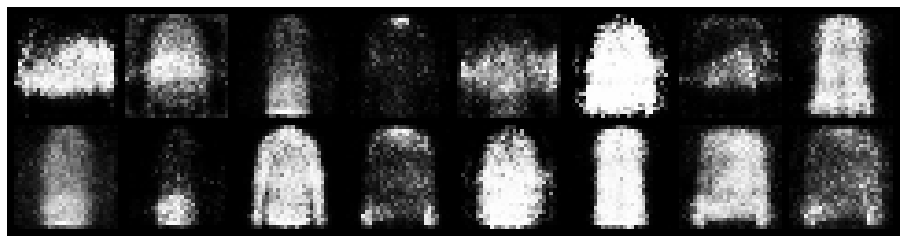

Epoch: [10/20], Batch Num: [100/600]
Discriminator Loss: 0.5319, Generator Loss: 2.3006
D(x): 0.8090, D(G(z)): 0.1582


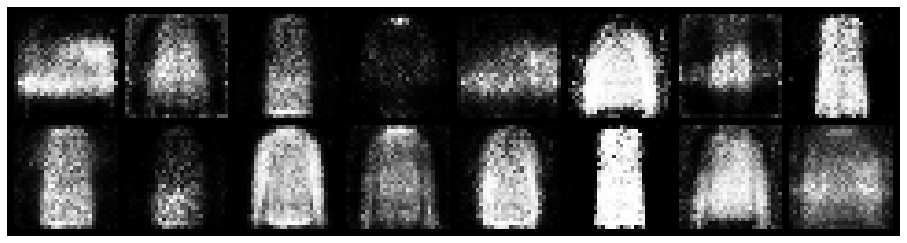

Epoch: [10/20], Batch Num: [200/600]
Discriminator Loss: 0.6041, Generator Loss: 1.9559
D(x): 0.7660, D(G(z)): 0.1935


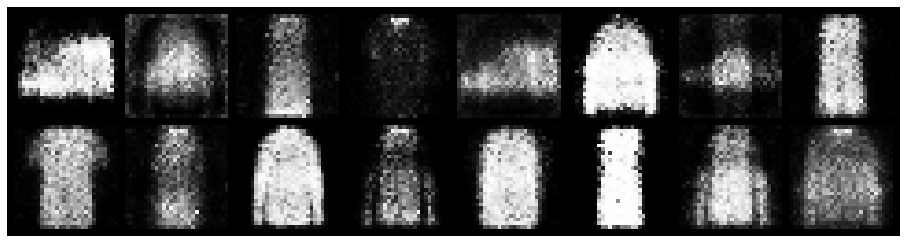

Epoch: [10/20], Batch Num: [300/600]
Discriminator Loss: 0.8746, Generator Loss: 1.5310
D(x): 0.7323, D(G(z)): 0.2494


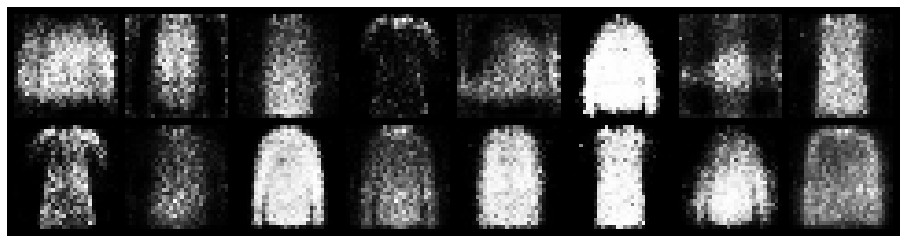

Epoch: [10/20], Batch Num: [400/600]
Discriminator Loss: 0.5687, Generator Loss: 2.0315
D(x): 0.8215, D(G(z)): 0.1687


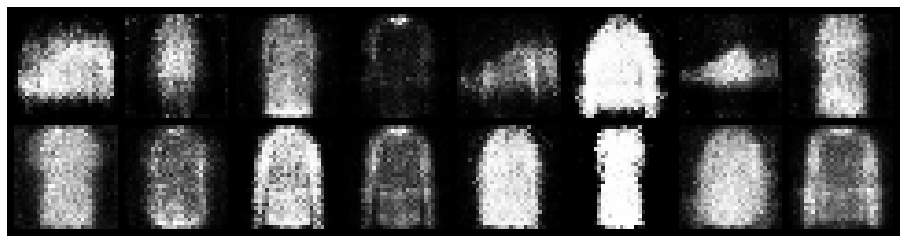

Epoch: [10/20], Batch Num: [500/600]
Discriminator Loss: 0.9014, Generator Loss: 1.6950
D(x): 0.7228, D(G(z)): 0.2571


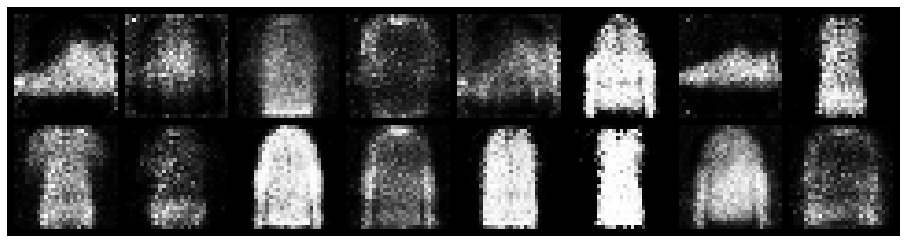

Epoch: [11/20], Batch Num: [0/600]
Discriminator Loss: 0.8128, Generator Loss: 2.0825
D(x): 0.8509, D(G(z)): 0.3163


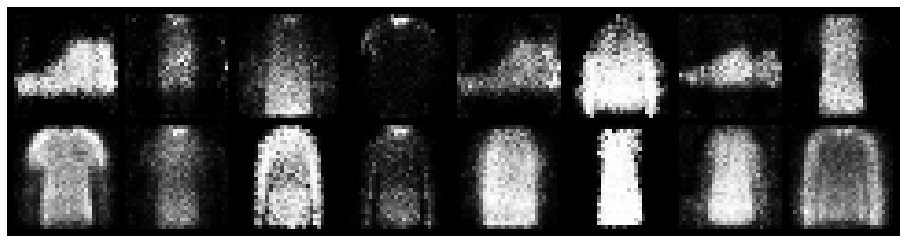

Epoch: [11/20], Batch Num: [100/600]
Discriminator Loss: 0.8638, Generator Loss: 1.7037
D(x): 0.7420, D(G(z)): 0.2519


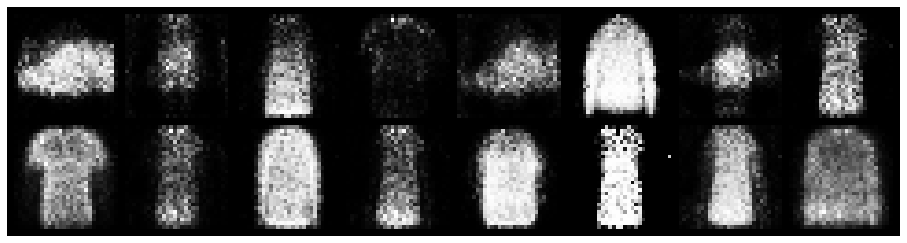

Epoch: [11/20], Batch Num: [200/600]
Discriminator Loss: 0.9169, Generator Loss: 1.8946
D(x): 0.7232, D(G(z)): 0.2660


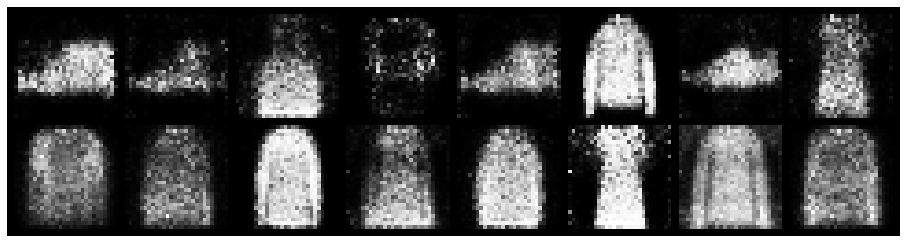

Epoch: [11/20], Batch Num: [300/600]
Discriminator Loss: 0.5904, Generator Loss: 2.0980
D(x): 0.8051, D(G(z)): 0.2385


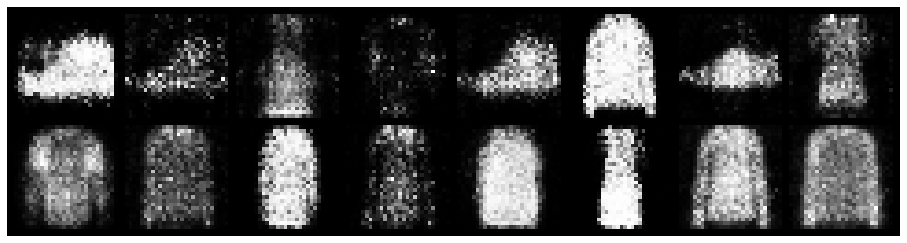

Epoch: [11/20], Batch Num: [400/600]
Discriminator Loss: 0.7343, Generator Loss: 2.2876
D(x): 0.7896, D(G(z)): 0.2216


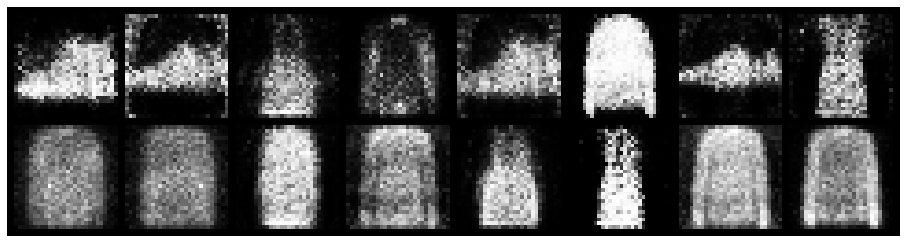

Epoch: [11/20], Batch Num: [500/600]
Discriminator Loss: 0.8702, Generator Loss: 2.3660
D(x): 0.7738, D(G(z)): 0.3056


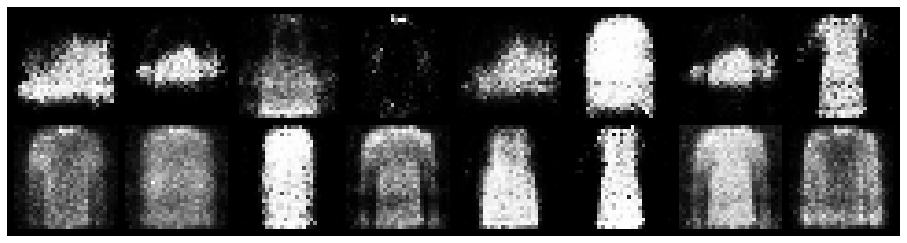

Epoch: [12/20], Batch Num: [0/600]
Discriminator Loss: 0.8744, Generator Loss: 1.8530
D(x): 0.7130, D(G(z)): 0.2305


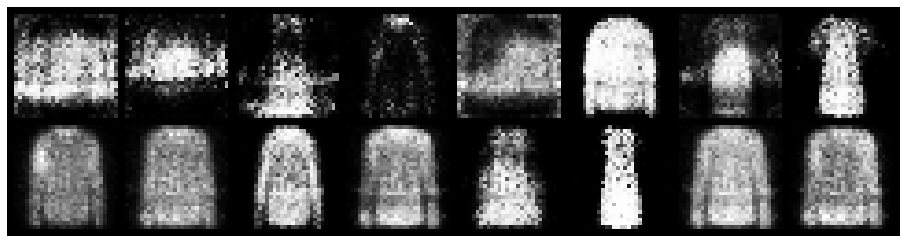

Epoch: [12/20], Batch Num: [100/600]
Discriminator Loss: 1.1202, Generator Loss: 1.2877
D(x): 0.7227, D(G(z)): 0.3514


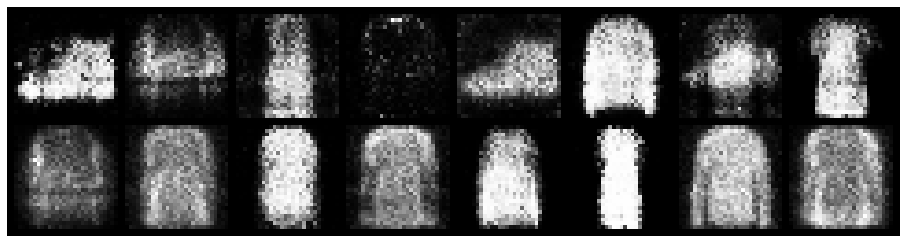

Epoch: [12/20], Batch Num: [200/600]
Discriminator Loss: 0.7865, Generator Loss: 1.8170
D(x): 0.7509, D(G(z)): 0.2489


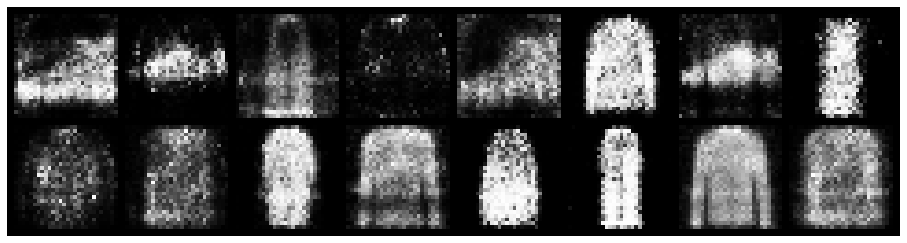

Epoch: [12/20], Batch Num: [300/600]
Discriminator Loss: 0.9667, Generator Loss: 1.6827
D(x): 0.7340, D(G(z)): 0.2953


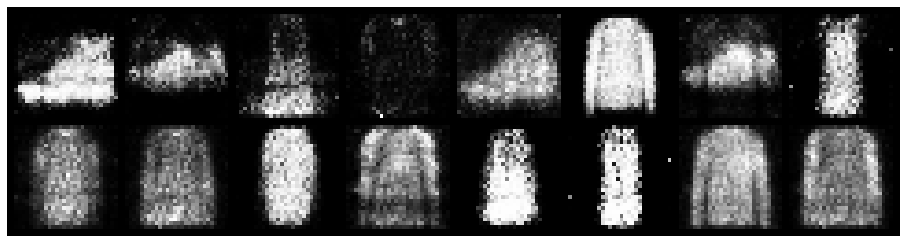

Epoch: [12/20], Batch Num: [400/600]
Discriminator Loss: 0.5594, Generator Loss: 2.1399
D(x): 0.8378, D(G(z)): 0.2147


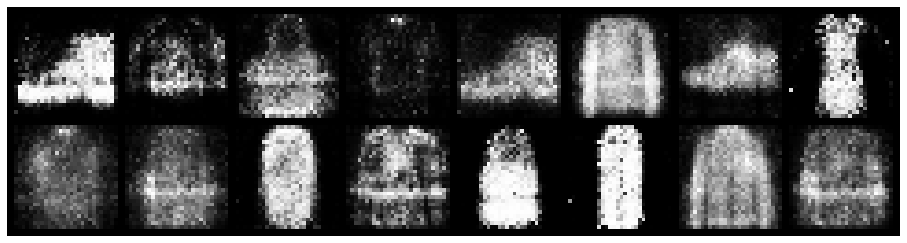

Epoch: [12/20], Batch Num: [500/600]
Discriminator Loss: 0.6109, Generator Loss: 2.4773
D(x): 0.7969, D(G(z)): 0.2089


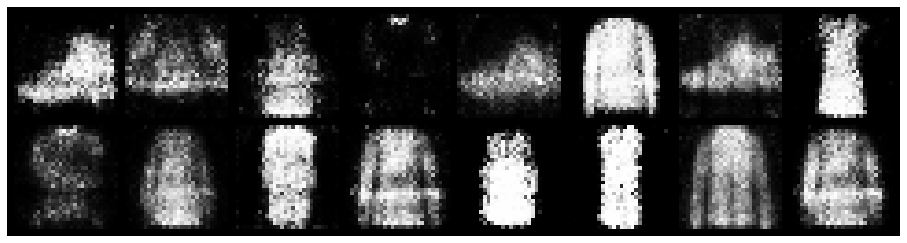

Epoch: [13/20], Batch Num: [0/600]
Discriminator Loss: 0.3857, Generator Loss: 2.3115
D(x): 0.8857, D(G(z)): 0.1858


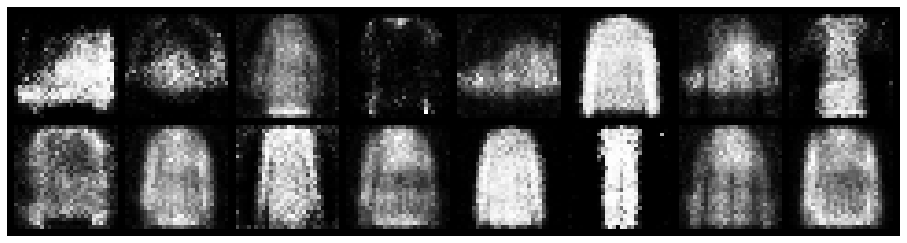

Epoch: [13/20], Batch Num: [100/600]
Discriminator Loss: 0.9841, Generator Loss: 1.5933
D(x): 0.7111, D(G(z)): 0.3180


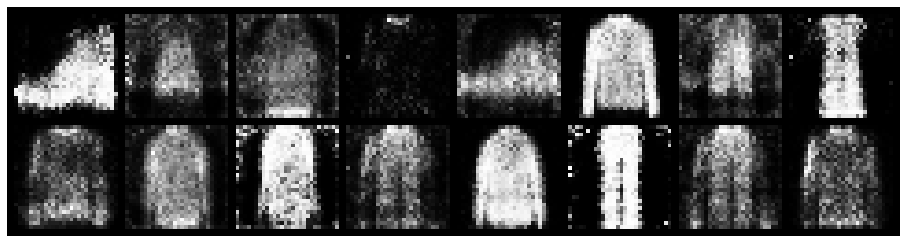

Epoch: [13/20], Batch Num: [200/600]
Discriminator Loss: 0.8724, Generator Loss: 1.8749
D(x): 0.7040, D(G(z)): 0.2260


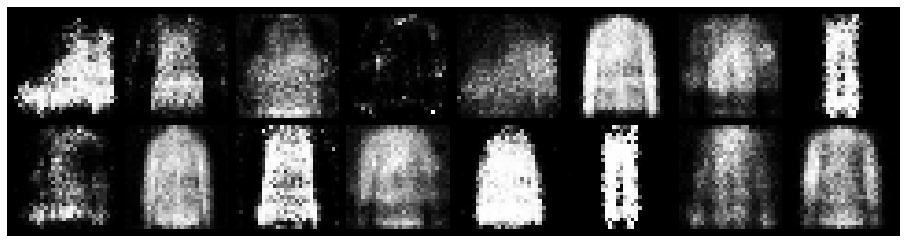

Epoch: [13/20], Batch Num: [300/600]
Discriminator Loss: 0.9039, Generator Loss: 1.9290
D(x): 0.7454, D(G(z)): 0.2496


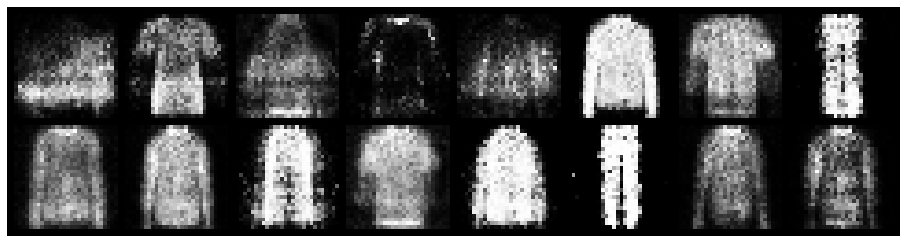

Epoch: [13/20], Batch Num: [400/600]
Discriminator Loss: 0.7115, Generator Loss: 2.2210
D(x): 0.7697, D(G(z)): 0.2092


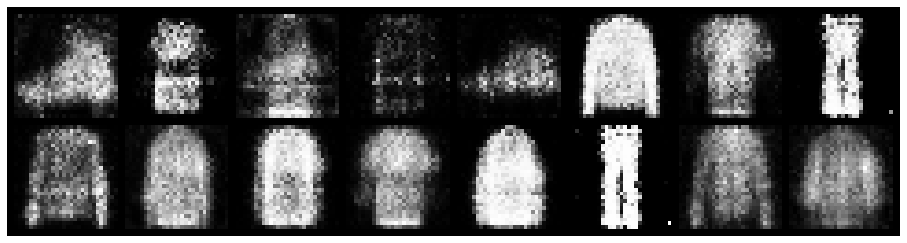

Epoch: [13/20], Batch Num: [500/600]
Discriminator Loss: 0.6663, Generator Loss: 2.1801
D(x): 0.8352, D(G(z)): 0.2983


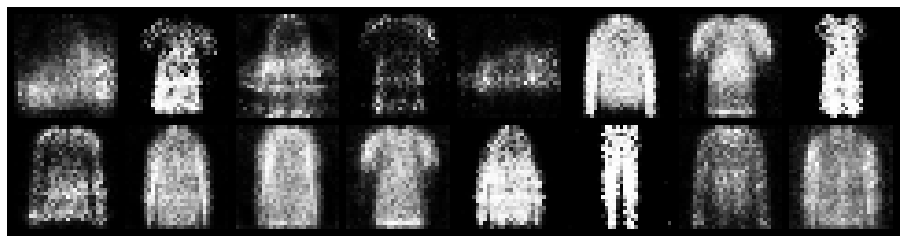

Epoch: [14/20], Batch Num: [0/600]
Discriminator Loss: 0.7671, Generator Loss: 1.8269
D(x): 0.7247, D(G(z)): 0.2329


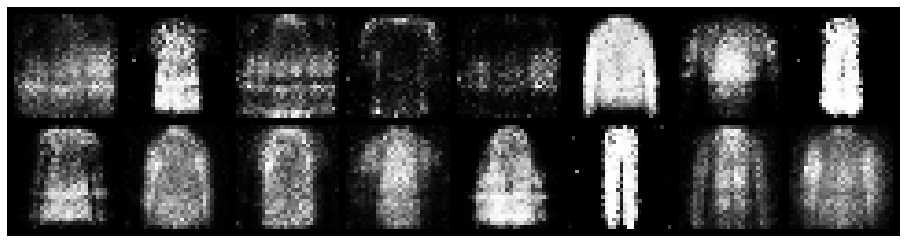

Epoch: [14/20], Batch Num: [100/600]
Discriminator Loss: 0.6610, Generator Loss: 2.0423
D(x): 0.7957, D(G(z)): 0.2416


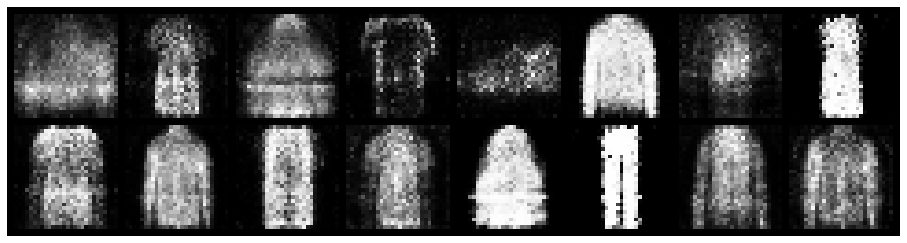

Epoch: [14/20], Batch Num: [200/600]
Discriminator Loss: 0.9032, Generator Loss: 1.9090
D(x): 0.6527, D(G(z)): 0.1996


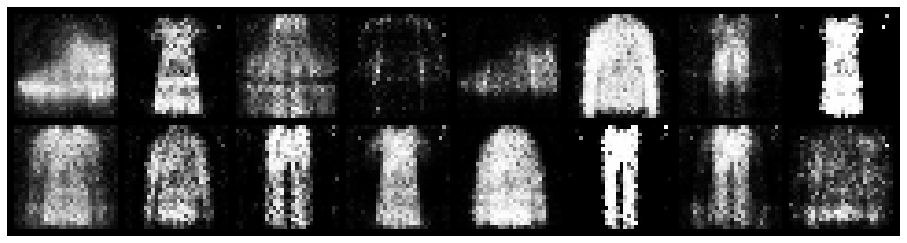

Epoch: [14/20], Batch Num: [300/600]
Discriminator Loss: 0.9820, Generator Loss: 1.9757
D(x): 0.7311, D(G(z)): 0.2905


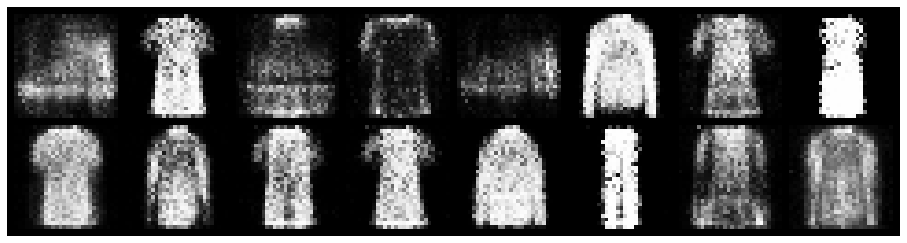

Epoch: [14/20], Batch Num: [400/600]
Discriminator Loss: 0.8676, Generator Loss: 1.4962
D(x): 0.7308, D(G(z)): 0.2626


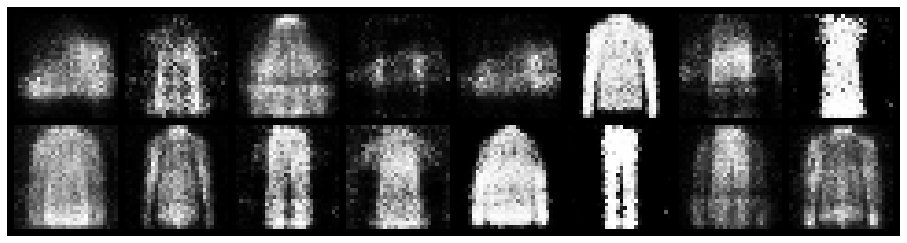

Epoch: [14/20], Batch Num: [500/600]
Discriminator Loss: 0.9335, Generator Loss: 1.7552
D(x): 0.7017, D(G(z)): 0.2925


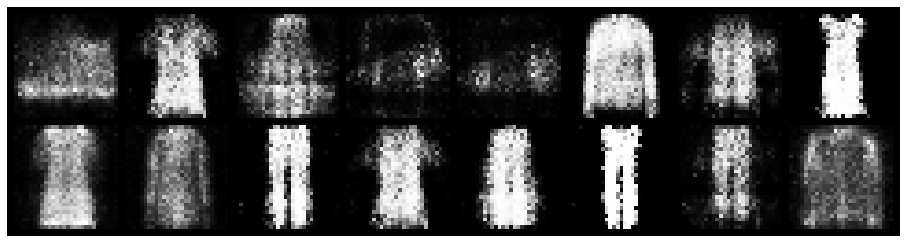

Epoch: [15/20], Batch Num: [0/600]
Discriminator Loss: 0.6463, Generator Loss: 2.2092
D(x): 0.7786, D(G(z)): 0.2290


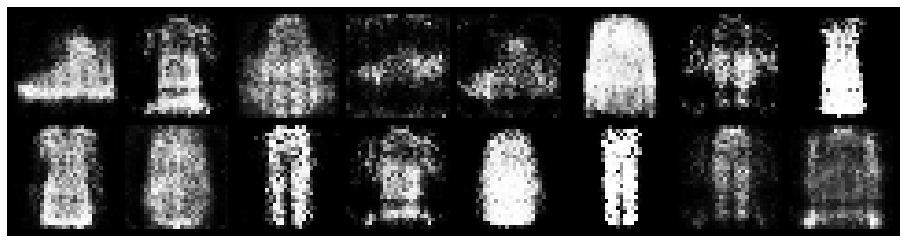

Epoch: [15/20], Batch Num: [100/600]
Discriminator Loss: 0.8852, Generator Loss: 1.8060
D(x): 0.6510, D(G(z)): 0.2267


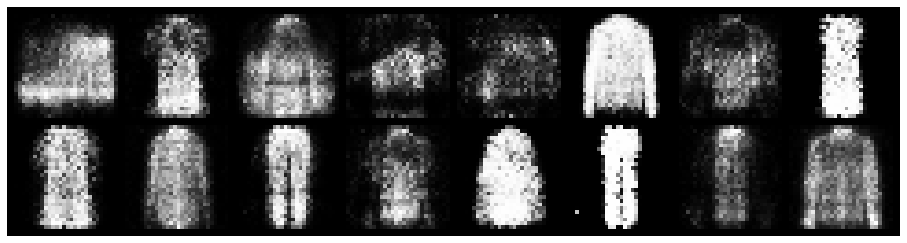

Epoch: [15/20], Batch Num: [200/600]
Discriminator Loss: 0.8354, Generator Loss: 1.7861
D(x): 0.7004, D(G(z)): 0.2433


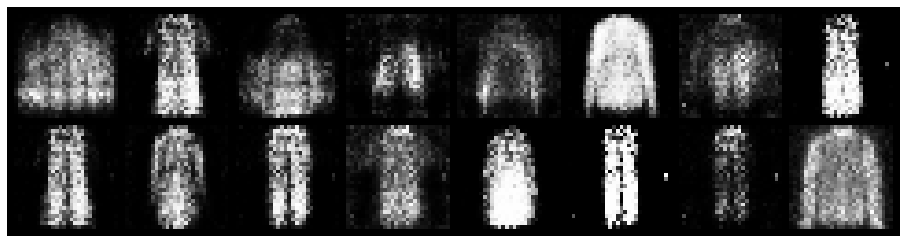

Epoch: [15/20], Batch Num: [300/600]
Discriminator Loss: 0.8375, Generator Loss: 1.7008
D(x): 0.7662, D(G(z)): 0.3273


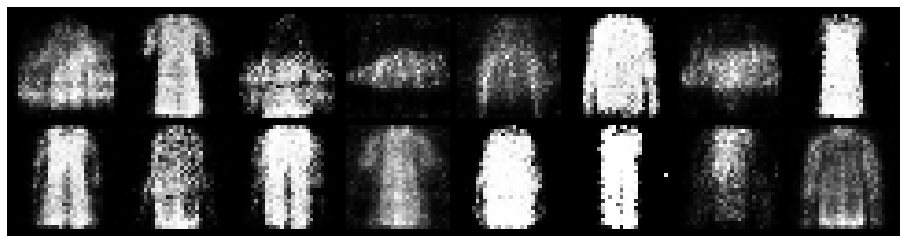

Epoch: [15/20], Batch Num: [400/600]
Discriminator Loss: 0.9252, Generator Loss: 1.7525
D(x): 0.6710, D(G(z)): 0.2612


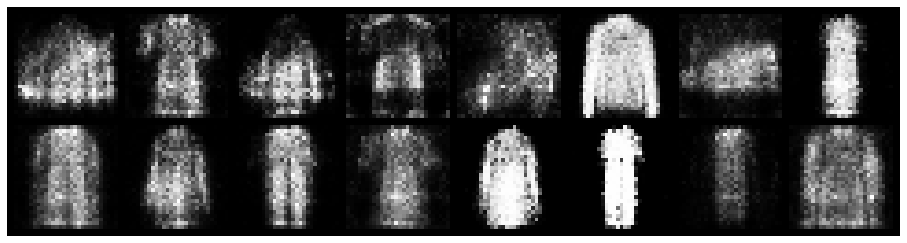

Epoch: [15/20], Batch Num: [500/600]
Discriminator Loss: 0.7387, Generator Loss: 1.7742
D(x): 0.7568, D(G(z)): 0.2747


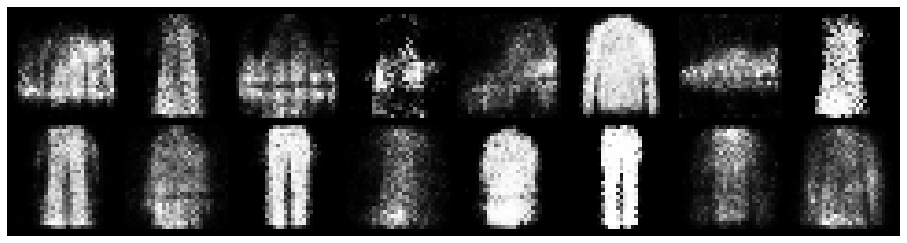

Epoch: [16/20], Batch Num: [0/600]
Discriminator Loss: 0.9106, Generator Loss: 1.5806
D(x): 0.6662, D(G(z)): 0.2443


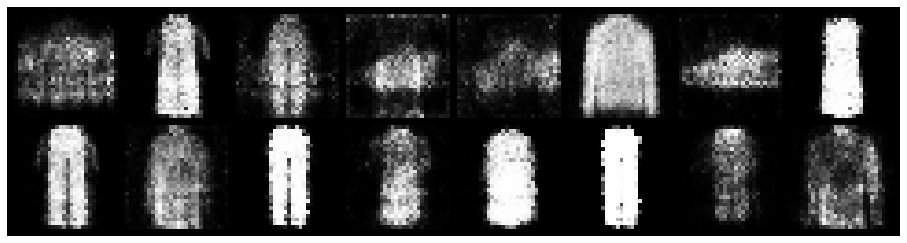

Epoch: [16/20], Batch Num: [100/600]
Discriminator Loss: 1.2160, Generator Loss: 1.6955
D(x): 0.6510, D(G(z)): 0.3393


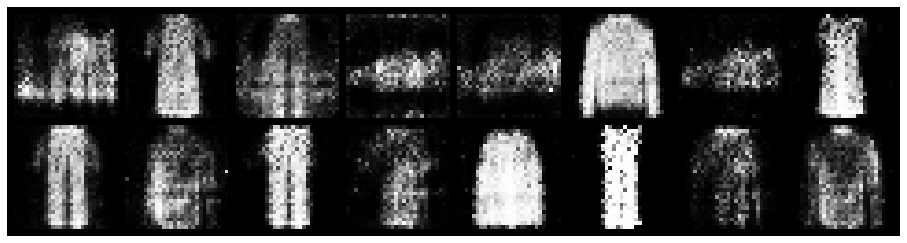

Epoch: [16/20], Batch Num: [200/600]
Discriminator Loss: 0.9805, Generator Loss: 1.8510
D(x): 0.6260, D(G(z)): 0.2180


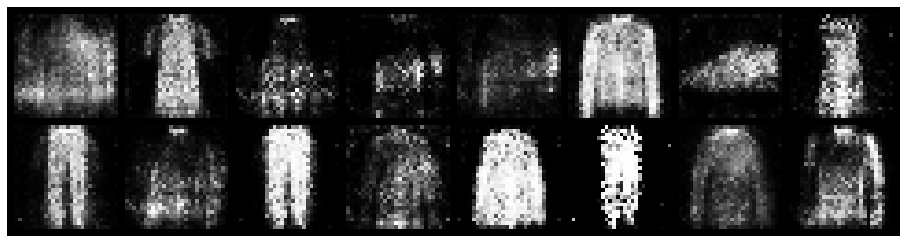

Epoch: [16/20], Batch Num: [300/600]
Discriminator Loss: 0.7246, Generator Loss: 1.8042
D(x): 0.7621, D(G(z)): 0.2327


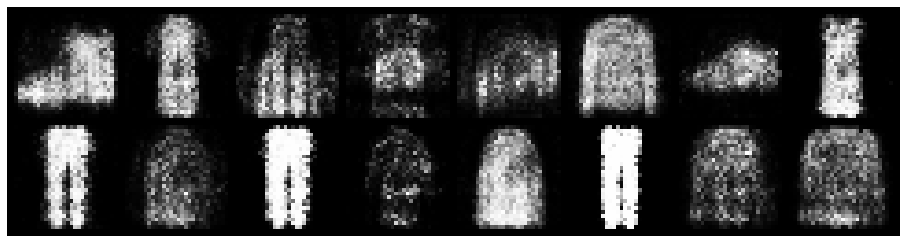

Epoch: [16/20], Batch Num: [400/600]
Discriminator Loss: 0.6043, Generator Loss: 2.1763
D(x): 0.7845, D(G(z)): 0.2220


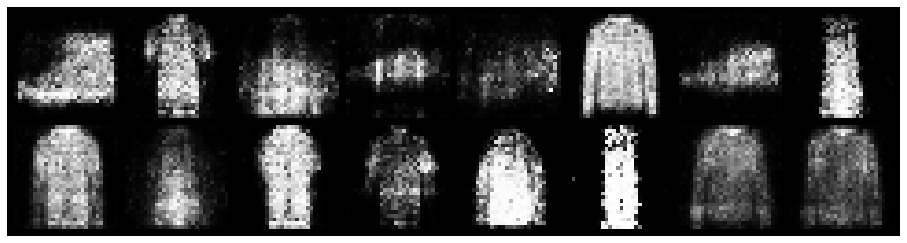

Epoch: [16/20], Batch Num: [500/600]
Discriminator Loss: 0.9252, Generator Loss: 1.5335
D(x): 0.7392, D(G(z)): 0.3333


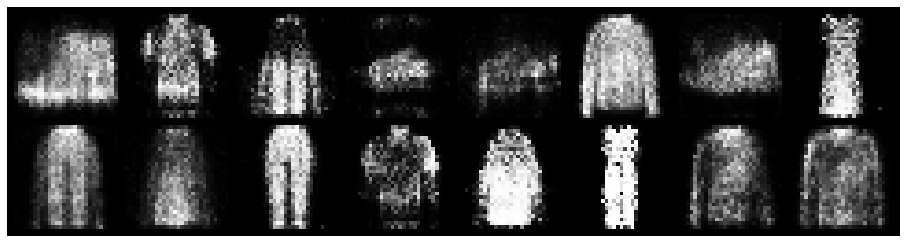

Epoch: [17/20], Batch Num: [0/600]
Discriminator Loss: 0.5935, Generator Loss: 1.7234
D(x): 0.8212, D(G(z)): 0.2629


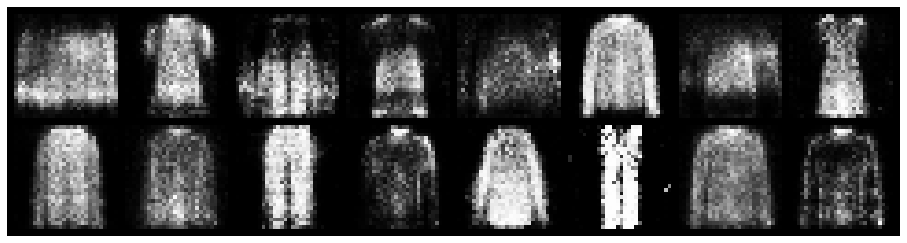

Epoch: [17/20], Batch Num: [100/600]
Discriminator Loss: 0.8461, Generator Loss: 1.6966
D(x): 0.7156, D(G(z)): 0.2713


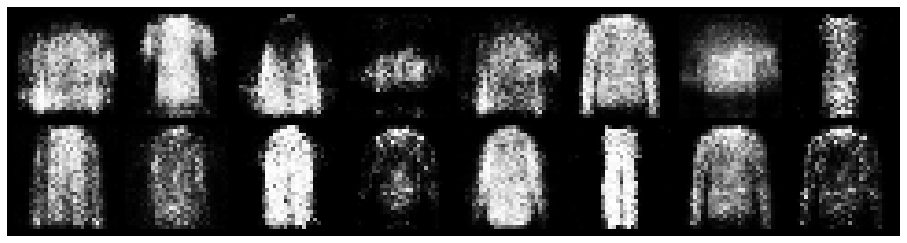

Epoch: [17/20], Batch Num: [200/600]
Discriminator Loss: 0.8675, Generator Loss: 1.2597
D(x): 0.7024, D(G(z)): 0.3171


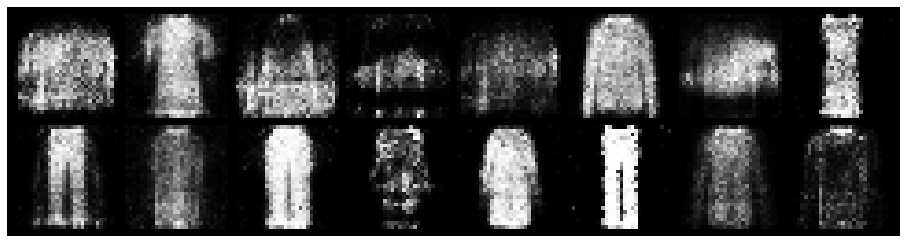

Epoch: [17/20], Batch Num: [300/600]
Discriminator Loss: 0.9014, Generator Loss: 1.7403
D(x): 0.7174, D(G(z)): 0.3043


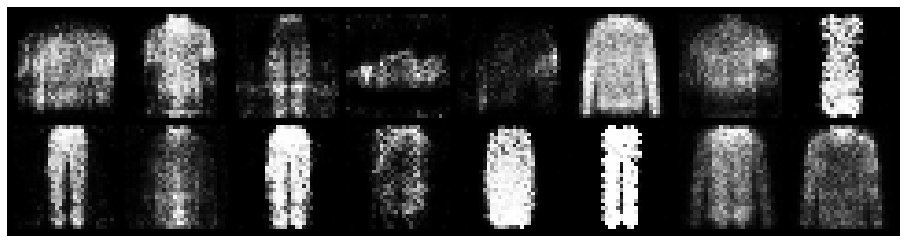

Epoch: [17/20], Batch Num: [400/600]
Discriminator Loss: 1.0432, Generator Loss: 1.3306
D(x): 0.6625, D(G(z)): 0.3298


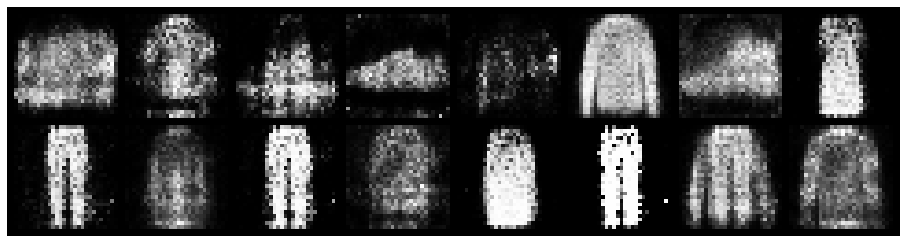

Epoch: [17/20], Batch Num: [500/600]
Discriminator Loss: 1.0338, Generator Loss: 1.6424
D(x): 0.6382, D(G(z)): 0.3097


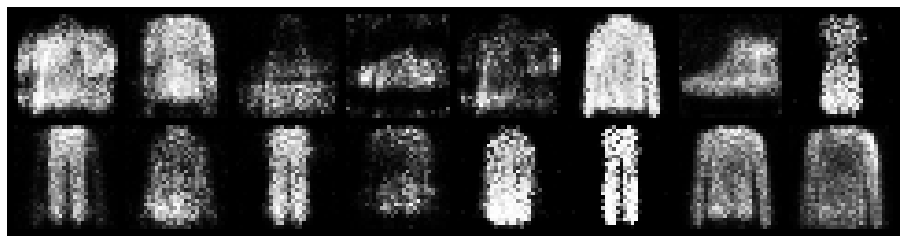

Epoch: [18/20], Batch Num: [0/600]
Discriminator Loss: 0.9322, Generator Loss: 1.5262
D(x): 0.7315, D(G(z)): 0.3363


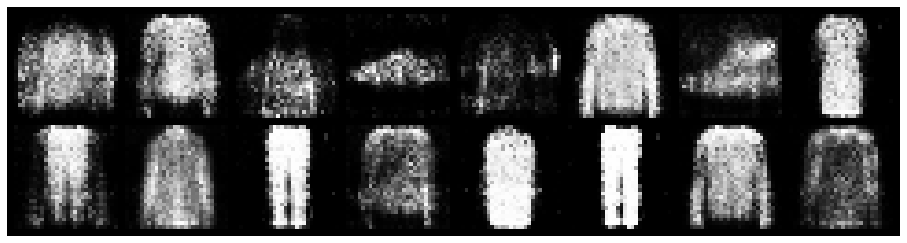

Epoch: [18/20], Batch Num: [100/600]
Discriminator Loss: 0.8943, Generator Loss: 1.7142
D(x): 0.6627, D(G(z)): 0.2390


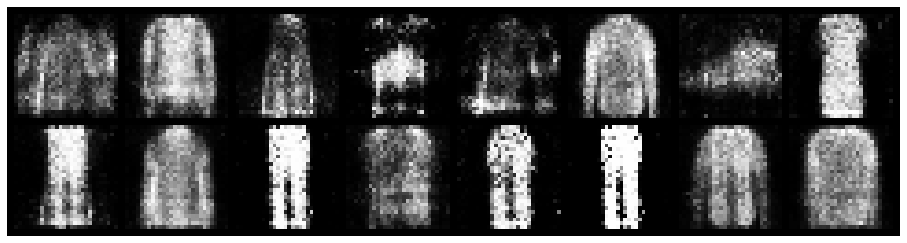

Epoch: [18/20], Batch Num: [200/600]
Discriminator Loss: 1.1516, Generator Loss: 1.5211
D(x): 0.6276, D(G(z)): 0.3312


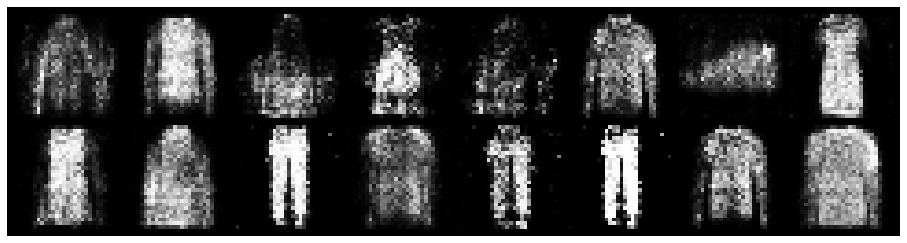

Epoch: [18/20], Batch Num: [300/600]
Discriminator Loss: 1.0106, Generator Loss: 1.4995
D(x): 0.7049, D(G(z)): 0.3651


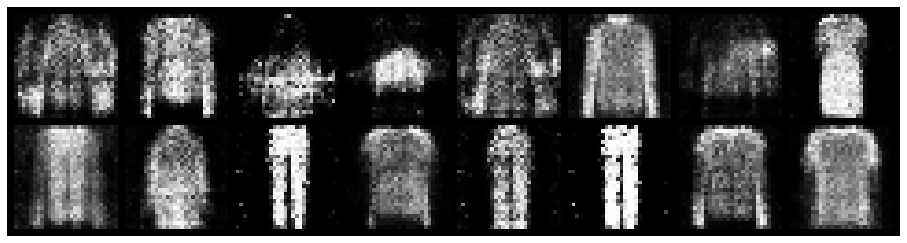

Epoch: [18/20], Batch Num: [400/600]
Discriminator Loss: 0.9525, Generator Loss: 1.3317
D(x): 0.6836, D(G(z)): 0.3191


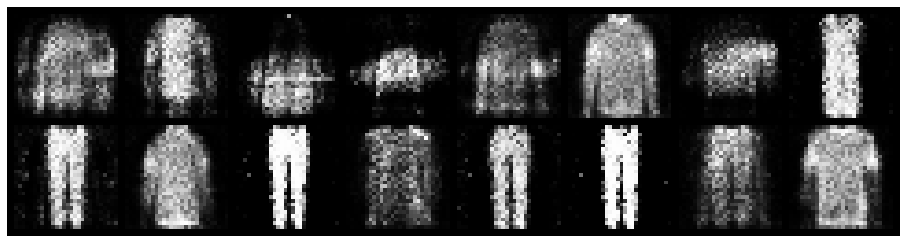

Epoch: [18/20], Batch Num: [500/600]
Discriminator Loss: 0.8733, Generator Loss: 1.8296
D(x): 0.6916, D(G(z)): 0.2681


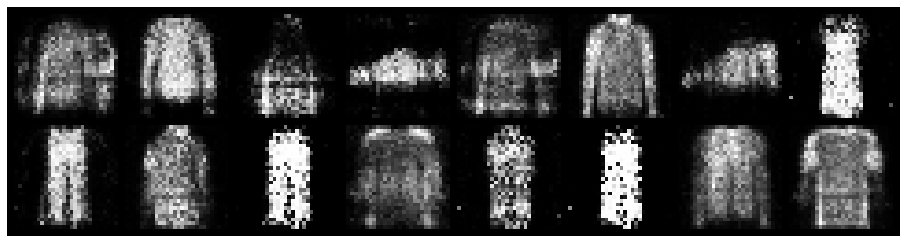

Epoch: [19/20], Batch Num: [0/600]
Discriminator Loss: 0.8968, Generator Loss: 1.6548
D(x): 0.7233, D(G(z)): 0.3051


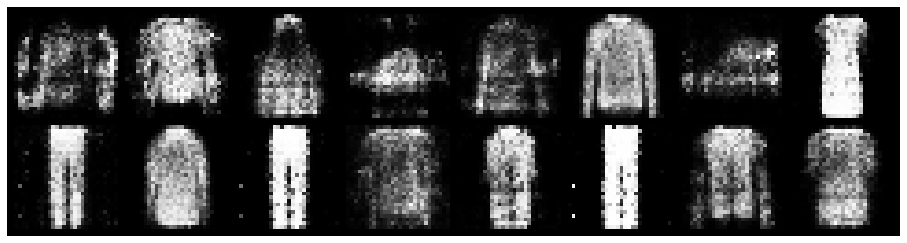

Epoch: [19/20], Batch Num: [100/600]
Discriminator Loss: 0.9241, Generator Loss: 1.6333
D(x): 0.6905, D(G(z)): 0.2683


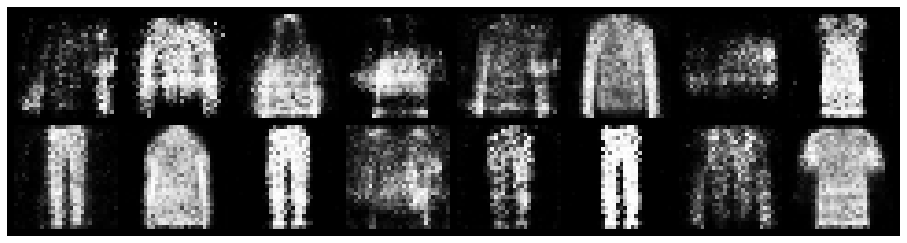

Epoch: [19/20], Batch Num: [200/600]
Discriminator Loss: 1.3887, Generator Loss: 1.4021
D(x): 0.6100, D(G(z)): 0.3408


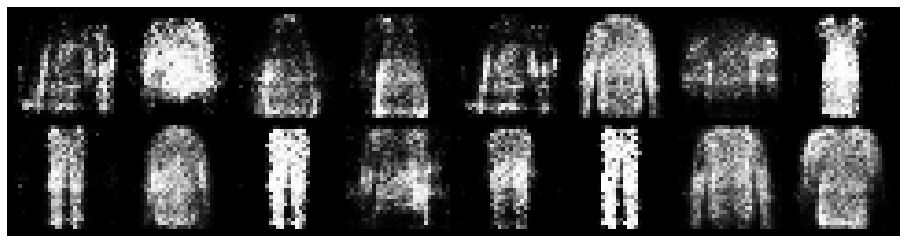

Epoch: [19/20], Batch Num: [300/600]
Discriminator Loss: 0.8207, Generator Loss: 1.4974
D(x): 0.7240, D(G(z)): 0.2707


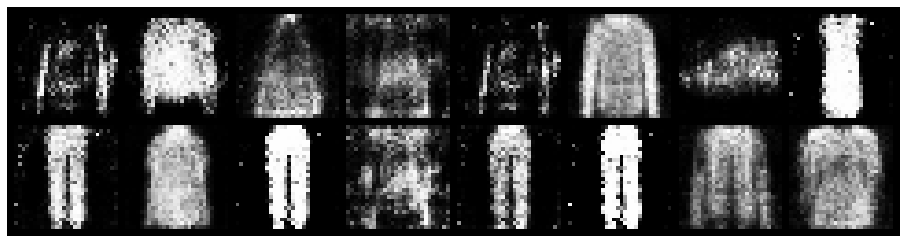

Epoch: [19/20], Batch Num: [400/600]
Discriminator Loss: 0.9526, Generator Loss: 1.6825
D(x): 0.7266, D(G(z)): 0.3176


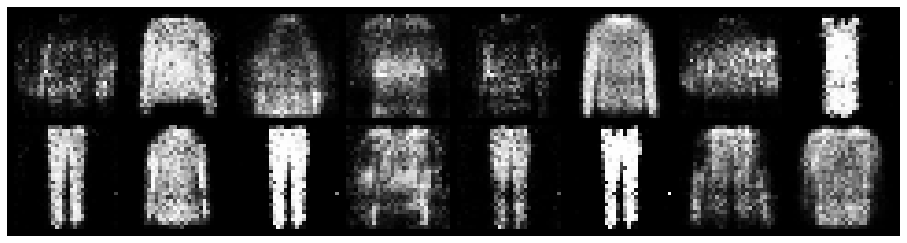

Epoch: [19/20], Batch Num: [500/600]
Discriminator Loss: 0.8192, Generator Loss: 1.4537
D(x): 0.6995, D(G(z)): 0.2551


In [27]:
# Create logger instance
logger = Logger(model_name='VGAN', data_name='MNIST')

# Total number of epochs to train
num_epochs = 20

for epoch in range(num_epochs):
    for n_batch, (real_batch,_) in enumerate(data_loader):
        N = real_batch.size(0)
        
        # 1. Train Discriminator
        real_data = Variable(images_to_vectors(real_batch))
        
        # Generate fake data and detach 
        # (so gradients are not calculated for generator)
        fake_data = generator(noise(N)).detach()
        
        # Train D
        d_error, d_pred_real, d_pred_fake = \
              train_discriminator(d_optimizer, real_data, fake_data)

        # 2. Train Generator
        # Generate fake data
        fake_data = generator(noise(N))
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        

        # Log batch error
        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        # Display Progress every few batches
        if (n_batch) % 100 == 0: 
            test_images = vectors_to_images(generator(test_noise))
            test_images = test_images.data
            logger.log_images(
                test_images, num_test_samples, 
                epoch, n_batch, num_batches
            );
            # Display status Logs
            logger.display_status(
                epoch, num_epochs, n_batch, num_batches,
                d_error, g_error, d_pred_real, d_pred_fake
            )